In [3]:
from google.colab import drive

drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [4]:
#Import Packages
import pandas as pd
import numpy as np
from scipy.stats import uniform # for training-and-test split
import statsmodels.api as sm # statistical models (including regression)
import statsmodels.formula.api as smf # R-like model specification
import matplotlib.pyplot as plt # 2D plotting
import seaborn as sns # PROVIDES TRELLIS AND SMALL MULTIPLE PLOTTING
from pathlib import Path # for merging dataframes
from sklearn.preprocessing import LabelEncoder #to numberize columns
from sklearn.preprocessing import OneHotEncoder #another way to numberize object columns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
#import required packages
import re
from pprint import pprint
import nltk; nltk.download('stopwords')
import sklearn
import datetime
from datetime import datetime, timedelta
from pandas import DataFrame
import sys
! {sys.executable} -m pip install progress #progress bars
from progress.bar import Bar

pd.set_option("display.max_colwidth", 200)

#gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

#spacy for lemmatization
import sys
! {sys.executable} -m pip install spacy
! {sys.executable} -m pip install https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-2.2.0/en_core_web_sm-2.2.0.tar.gz
import spacy 


#from spacy_langdetect import LanguageDetector
#nlp = spacy.load('en')
#nlp.add_pipe(LanguageDetector(), name='language_detector', last=True)

# Plotting tools
! {sys.executable} -m pip install pyLDAvis
import pyLDAvis
import pyLDAvis.gensim  # don't skip this

# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
  Created wheel for progress: filename=progress-1.5-cp36-none-any.whl size=8074 sha256=f05445b9a064673b913ceafc258d7d64bf92c7c8783bf03668e253a964e3972c
  Stored in directory: /root/.cache/pip/wheels/6c/c8/80/32a294e3041f006c661838c05a411c7b7ffc60ff939d14e116
Successfully built progress
     |████████████████████████████████| 12.0MB 691kB/s 
  Created wheel for en-core-web-sm: filename=en_core_web_sm-2.2.0-cp36-none-any.whl size=12019126 sha256=394f8549ae689ccc1c44622e6e3285f5e014ba3864423e18aa0359d663ea2af6
  Stored in directory: /root/.cache/pip/wheels/48/5c/1c/15f9d02afc8221a668d2172446dd8467b20cdb9aef80a172a4
Successfully built en-core-web-sm
  Found existing installation: en-core-web-sm 2.2.5
    Uninstalling en-core-web-sm-2.2.5:
      Successfully uninstalled en-core-web-sm-2.2.5
     |████████████████████████████████| 1.6MB 5.7MB/s 
  Created wheel for pyLDAvis: filenam

## A_DATA

In [ ]:
#COMPANY J
#read in data

a_data = pd.read_csv('/content/gdrive/Shareddrives/IST 718 Project/a_cleaned.csv')
a_data

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,assignment_group,number,state,priority,short_description,description,comments_and_work_notes,work_notes,close_notes,location,sys_created_on,closed_at,u_initial_response_sla_completed,bus_dur_num,cal_dur_num,reassignment_count,sys_mod_count,assigned_to,closed_by,contact_type,sys_created_by,sla_due,u_task_number_flag,sys_class_name,sys_updated_on,sys_updated_by,urgency,work_start,opened_at,active,comments,closed_by.average_daily_fte,closed_by.city,activity_due,approval,location.city,impact,knowledge,u_reason_to_hold,location.country,location.u_location_id,location.state,location.u_region,u_actual_category,u_actual_subcategory,u_cause,u_cause_code,u_qs_fcresolve,u_misrouted,due_date,sys_domain,task_effective_number,TicketDuration,CalendarDuration,BusinessDuration
0,0,0,0,I-ACM-SD L1-India,INC1499259,Cancelled,P4,user need to install jet stream viewer,NaN,10-27-2020 13:29:00 - Rajat Kumar (Additional comments)\nIncident is Cancelled and a Request Item RITM0974470 is created.\n\n,NaN,NaN,belfast,2020-10-27 12:50:00,2020-10-27 13:29:00,False,2337,2337,1,1,Rajat Kumar,NaN,Chat,NaN,UNKNOWN,NaN,Incident,2020-10-27 13:29:00,7.0,2,10/27/2020 13:29,2020-10-27 12:50:00,False,10-27-2020 13:29:00 - rajat kumar (additional comments)\nincident is cancelled and a request item ritm0974470 is created.\n\n,NaN,los angeles,UNKNOWN,Not Yet Requested,belfast,3 - Low,False,NaN,united kingdom,GB-GNGBP681-0002/BLDG,county antrim,europe(emea),software,software breakfix,NaN,NaN,False,False,NaN,NaN,NaN,0 days 00:39:00,0:38:57,0:38:57
1,3,3,3,I-ACM-CTS-India,INC1498224,Cancelled,P4,need assistance turning on bitlocker,name:sanjay kumar\r\nphone:566539297\r\nemail address:sanjay.kumar4@aecom.com\r\nthe user called in stating his bitlocker is switched off on his computer and needs to switch it on \r\ntook remote ...,10-27-2020 12:22:04 - Kaveri S (Additional comments)\nIncident is Cancelled and a Request Item RITM0974445 is created.\n\n10-27-2020 12:21:54 - Kaveri S (Work notes)\nmcafee is installed on the c...,10-27-2020 12:21:54 - Kaveri S (Work notes)\nmcafee is installed on the computer\r\nbit locker is not enabled\r\ncreating a request ticket to remove mcafee\r\n\r\nKB0033325\n\n10-27-2020 12:20:37 ...,NaN,"riyadh, SA",2020-10-27 00:29:00,2020-10-27 12:22:00,False,1324,42739,1,12,Kaveri S,NaN,Phone,9.0,UNKNOWN,NaN,Incident,2020-10-27 12:22:00,9.0,2,10/27/2020 0:33,2020-10-27 00:29:00,False,10-27-2020 12:22:04 - kaveri s (additional comments)\nincident is cancelled and a request item ritm0974445 is created.\n\n10-27-2020 00:29:45 - abdul baig (additional comments)\nname:sanjay kumar...,NaN,los angeles,UNKNOWN,Not Yet Requested,riyadh,3 - Low,False,NaN,saudi arabia,NaN,NaN,middle east (emea),security,bitlocker - break/fix,NaN,NaN,False,False,NaN,NaN,NaN,0 days 11:53:00,11:52:19,0:22:04
2,4,4,4,I-ACM-SD Self Serv,INC1498051,Cancelled,P4,unable to obtain autocad license at home,description: i am trying to obtain a license for autocad at home. it pops up with an error message saying one cannot be borrowed this time and to contact my system administrator.,10-27-2020 02:58:38 - Sakshi Srivastava (Additional comments)\nIncident is Cancelled and a Request Item RITM0973929 is created.\n\n,NaN,NaN,perth,2020-10-26 20:12:00,2020-10-27 02:58:00,False,0,24359,0,2,Sakshi Srivastava,NaN,Self-service,1.0,UNKNOWN,NaN,Incident,2020-10-27 02:58:00,9.0,3,10/26/2020 20:30,2020-10-26 20:12:00,False,10-27-2020 02:58:38 - sakshi srivastava (additional comments)\nincident is cancelled and a request item ritm0973929 is created.\n\n,NaN,los angeles,UNKNOWN,Not Yet Requested,perth,3 - Low,False,NaN,australia,NaN,western australia,australia new zealand (apac),software,software breakfix,NaN,NaN,False,False,NaN,NaN,NaN,0 days 06:46:00,6:45:59,0:00:00
3,6,6,6,I-ACM-CTS-India,INC1497739,Cancelled,P4,user not able to login remotely / ritm0955755,ritm0955755 - user did not receive any email \r\nfaces error - she gets error when she tries to login rem

In [ ]:
a_data['category'] =  a_data['u_actual_category'].astype(str)
a_data['subcategory'] =  a_data['u_actual_subcategory'].astype(str)

In [ ]:
#Make some Pareto Plots Source:https://tylermarrs.com/posts/pareto-plot-with-matplotlib/
def pareto_plot(df, x=None, y=None, title=None, show_pct_y=False, pct_format='{0:.0%}'):
    xlabel = x
    ylabel = y
    tmp = df.sort_values(y, ascending=False)
    x = tmp[x].values
    y = tmp[y].values
    weights = y / y.sum()
    cumsum = weights.cumsum()
    cumsum1 = []
    
    for n in cumsum:
      a = round(n)
      cumsum1.append(a)

    
    fig, ax1 = plt.subplots()
    ax1.bar(x, y)
    ax1.set_xlabel(xlabel)
    ax1.set_ylabel(ylabel)

    ax2 = ax1.twinx()
    ax2.plot(x, cumsum1, '-ro', alpha=0.5)
    ax2.set_ylabel('', color='r')
    ax2.tick_params('y', colors='r')
    
    vals = ax2.get_yticks()
    ax2.set_yticklabels(['{:,.2%}'.format(x) for x in vals])

    # hide y-labels on right side
    if not show_pct_y:
        ax2.set_yticks([])
    
    formatted_weights = [pct_format.format(x) for x in cumsum]
    for i, txt in enumerate(formatted_weights):
        ax2.annotate(txt, (x[i], cumsum[i]), fontweight='heavy')    
    
    if title:
        plt.title(title)
    
    plt.tight_layout()
    plt.show()

In [ ]:
'''y = j_data.bus_dur_num.values
weights =  y / y.sum()
cumsum = weights.cumsum()
cumsum1 = []

for n in cumsum:
  a = round(n)
  cumsum1.append(a)

cumsum1'''

'y = j_data.bus_dur_num.values\nweights =  y / y.sum()\ncumsum = weights.cumsum()\ncumsum1 = []\n\nfor n in cumsum:\n  a = round(n)\n  cumsum1.append(a)\n\ncumsum1'

In [ ]:
#pareto_plot(j_data, x='category', y='bus_dur_num', title='Ticket Duration by Assignment Group')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16],
 <a list of 17 Text major ticklabel objects>)

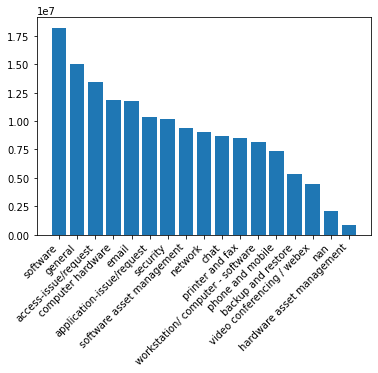

In [ ]:
tmp = a_data.sort_values('bus_dur_num', ascending=False)
plt.bar(tmp['category'], tmp['bus_dur_num'])
plt.xticks(rotation=45, ha='right')

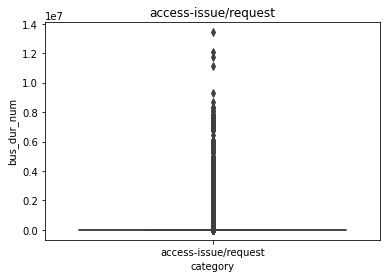

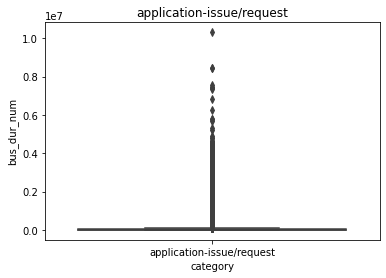

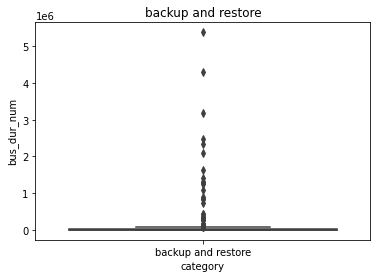

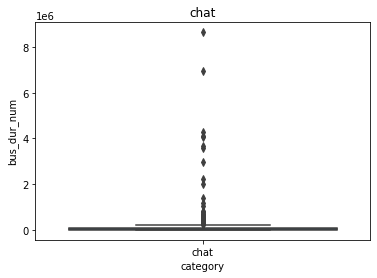

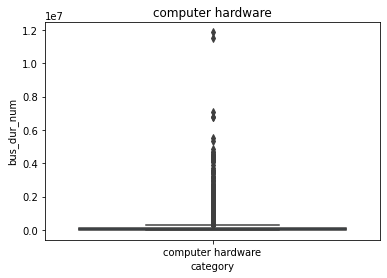

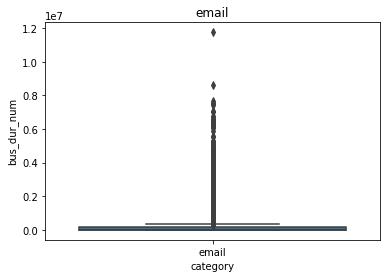

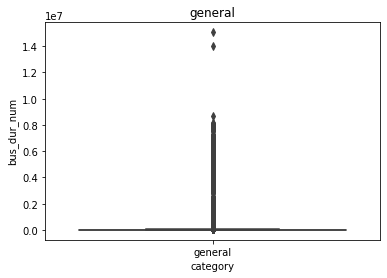

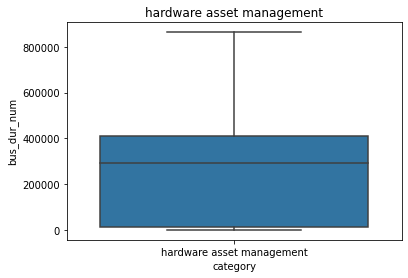

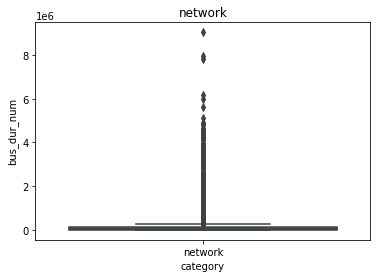

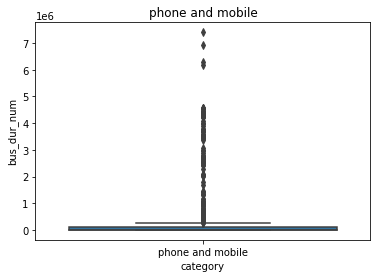

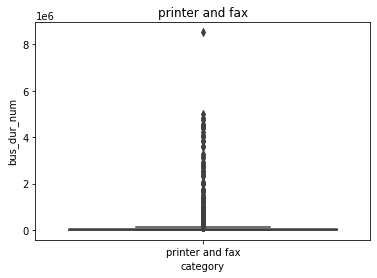

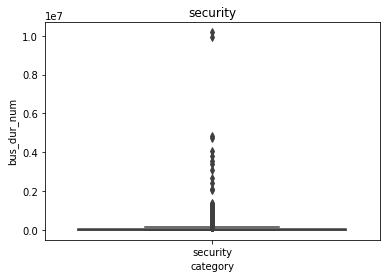

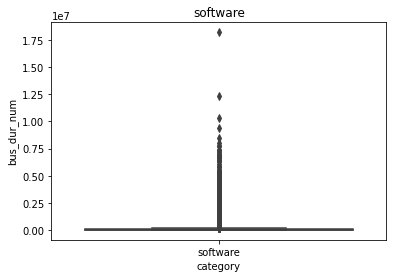

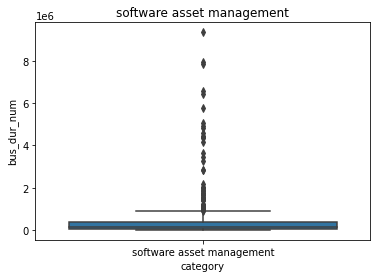

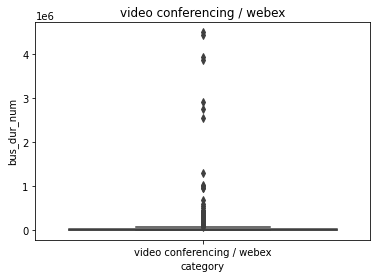

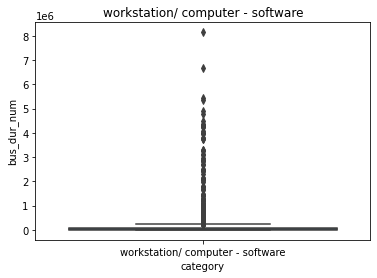

In [ ]:
from matplotlib.cbook import boxplot_stats

categories = np.unique(tmp['category'])
categories = np.delete(categories, np.where(categories == 'nan'))
categories

out_count = {}
out_count_norm = {}
out_agg = pd.DataFrame()

for n in categories:
  a = tmp[tmp['category']== n]
  plt.figure(n)
  sns.boxplot(x='category', y="bus_dur_num", data=a).set_title(n)
  outliers = [y for stat in boxplot_stats(a['bus_dur_num']) for y in stat['fliers']]
  out_count[n] = len(outliers)
  out_count_norm[n] = (len(outliers)/len(a))*100

  
  #out_agg = pd.concat([out_agg,outliers])



  
  


In [ ]:
import operator
out_count = dict( sorted(out_count.items(), key=operator.itemgetter(1),reverse=True))
out_count_norm = dict( sorted(out_count_norm.items(), key=operator.itemgetter(1),reverse=True))
print(out_count) #look at what has most outliers to see what's taking inordinate time
print(out_count_norm)
#a_out = out_agg

#Total Number Outliers
#access-issue/request 9227 21%
#software 2653 13.3%
#application-issue/request 1729 14.5%
#general 779  19.6% ***
#email 654 14.5%
#computer hardware 582 12%

{'access-issue/request': 9227, 'software': 2653, 'application-issue/request': 1729, 'general': 779, 'email': 654, 'computer hardware': 582, 'network': 333, 'printer and fax': 302, 'workstation/ computer - software': 280, 'security': 234, 'phone and mobile': 149, 'chat': 58, 'software asset management': 52, 'video conferencing / webex': 50, 'backup and restore': 37, 'hardware asset management': 0}
{'access-issue/request': 21.070058458165875, 'general': 19.6518668012109, 'backup and restore': 16.818181818181817, 'phone and mobile': 15.618448637316561, 'video conferencing / webex': 15.24390243902439, 'printer and fax': 14.891518737672586, 'network': 14.592462751971954, 'email': 14.543028685790526, 'application-issue/request': 14.536741214057509, 'security': 14.079422382671481, 'software asset management': 13.756613756613756, 'workstation/ computer - software': 13.579049466537343, 'software': 13.301579343193785, 'chat': 12.691466083150985, 'computer hardware': 12.0, 'hardware asset managem

In [ ]:
outlier_sum = pd.DataFrame.from_dict(out_count, orient = 'index', columns=['count'])
outlier_sum.reset_index(inplace = True)
outlier_sum = outlier_sum.rename(columns = {'index':'category'})
outlier_sum['percentage'] = outlier_sum['category'].map(out_count_norm)

outlier_sum

,category,count,percentage
0,access-issue/request,9227,21.070058
1,software,2653,13.301579
2,application-issue/request,1729,14.536741
3,general,779,19.651867
4,email,654,14.543029
5,computer hardware,582,12.000000
6,network,333,14.592463
7,printer and fax,302,14.891519
8,workstation/ computer - software,280,13.579049
9,security,234,14.079422


In [ ]:
#Subcategory search based on selected categories

catagg = outlier_sum['category']
selcat = ['access-issue/request', 'software', 'application-issue/request', 'general', 'email', 'computer hardware']


In [ ]:
catagg

0                 access-issue/request
1                             software
2            application-issue/request
3                              general
4                                email
5                    computer hardware
6                              network
7                      printer and fax
8     workstation/ computer - software
9                             security
10                    phone and mobile
11                                chat
12           software asset management
13          video conferencing / webex
14                  backup and restore
15           hardware asset management
Name: category, dtype: object

BOXPLOTS FOR SUBCATEGORIES WITHIN access-issue/request


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control 

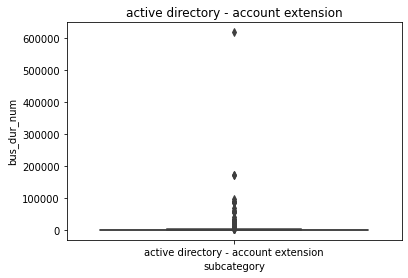

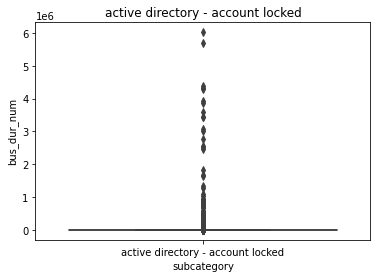

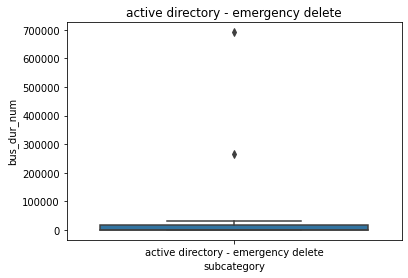

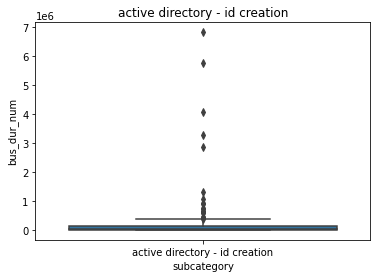

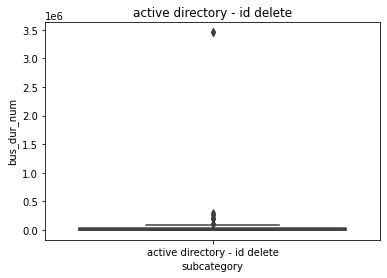

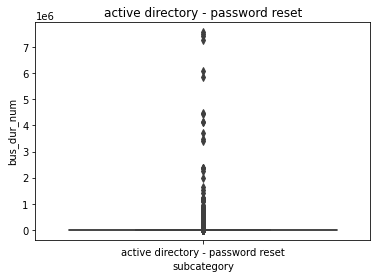

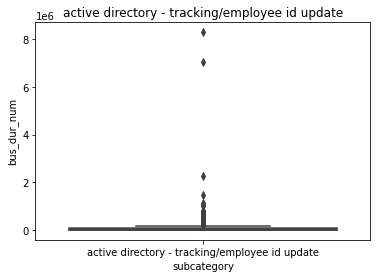

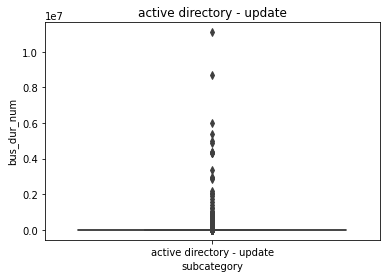

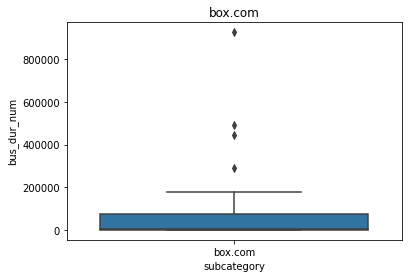

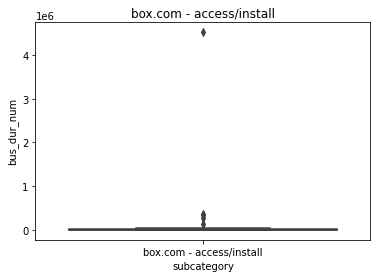

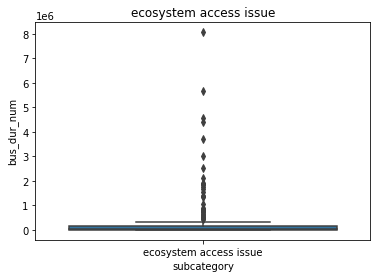

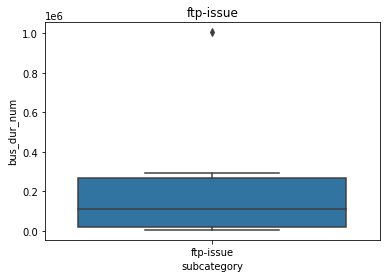

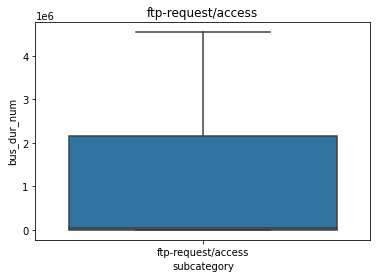

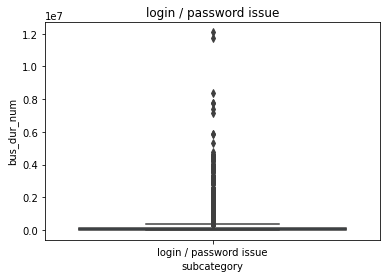

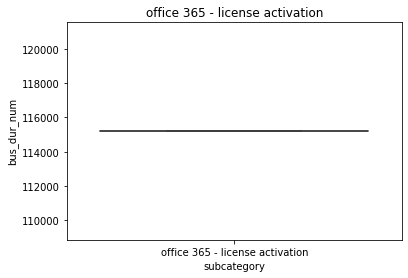

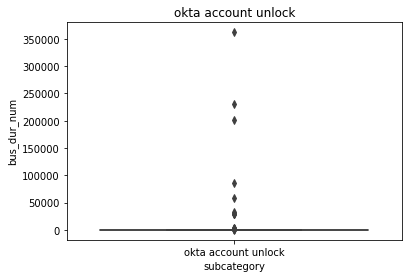

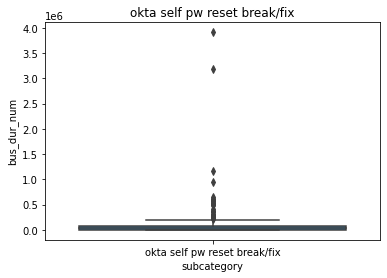

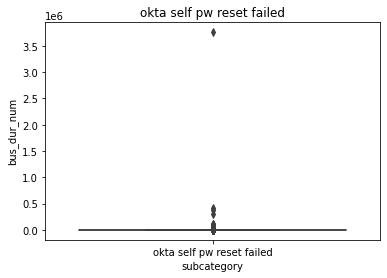

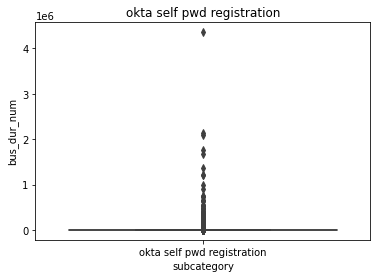

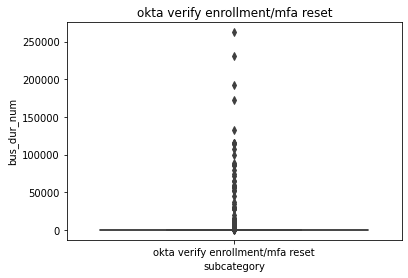

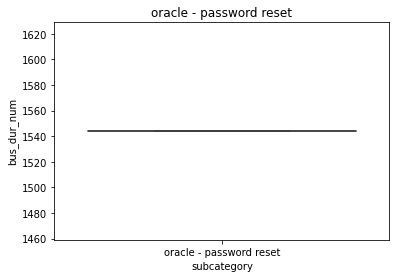

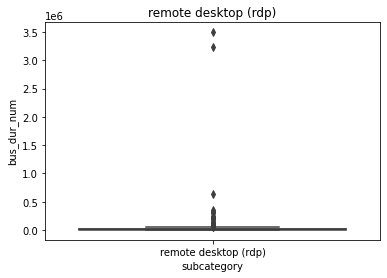

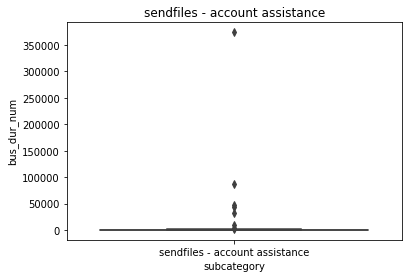

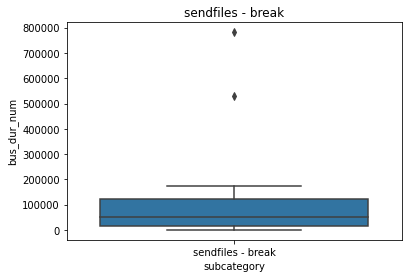

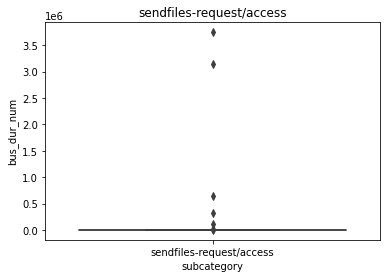

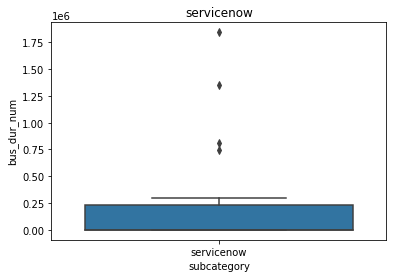

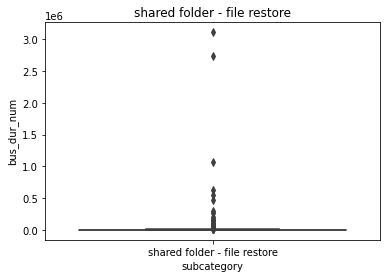

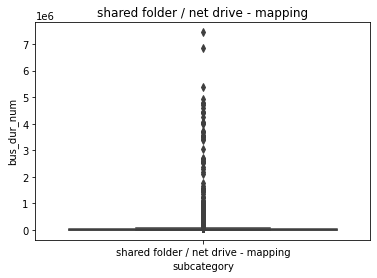

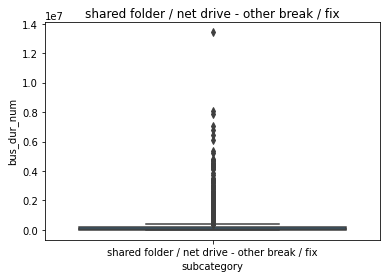

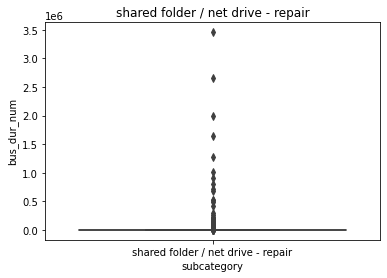

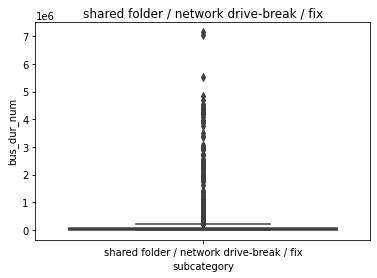

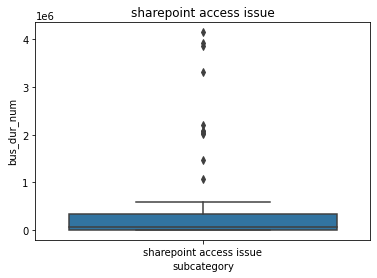

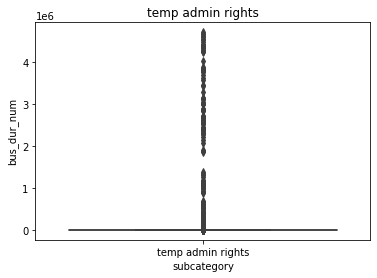

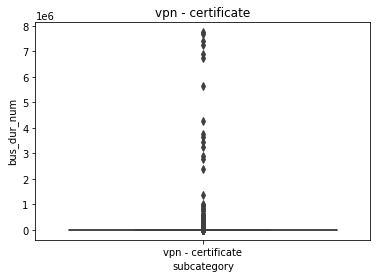

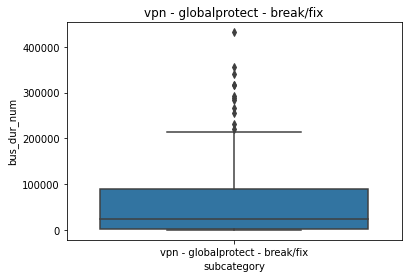

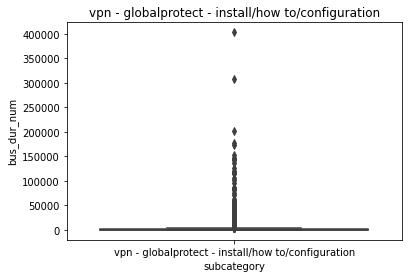

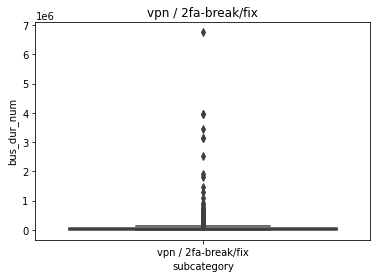

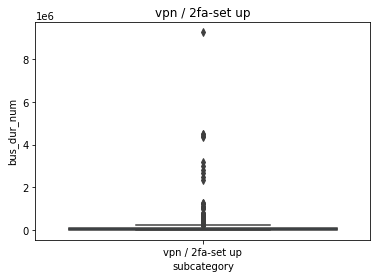

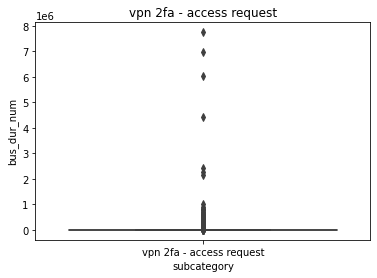

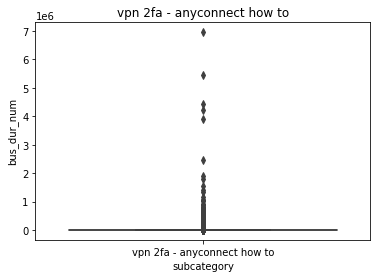

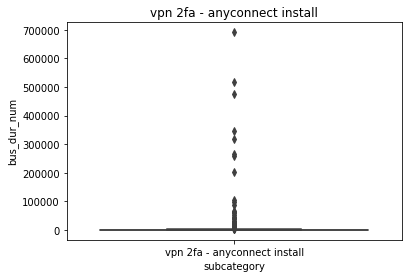

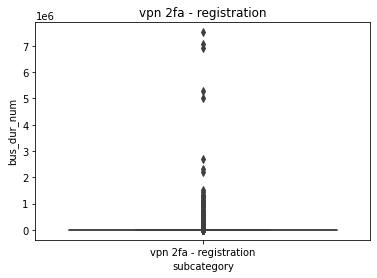

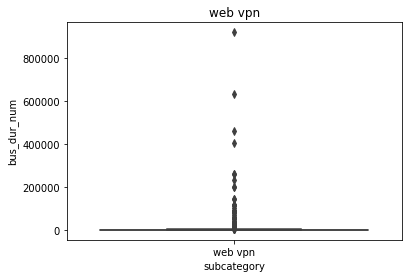

In [ ]:
tmp = a_data[a_data['category'] == catagg[0]]
cat = catagg[0]

categories = np.unique(tmp['subcategory'])
categories = np.delete(categories, np.where(categories == 'nan'))
categories

sout_count = {}
sout_count_norm = {}
sout_agg = pd.DataFrame()
#subcat_out0 = pd.DataFrame()

print('BOXPLOTS FOR SUBCATEGORIES WITHIN {}'.format(selcat[0]))
for n in categories:
  a = tmp[tmp['subcategory']== n]
  plt.figure(n)
  sns.boxplot(x='subcategory', y="bus_dur_num", data=a).set_title(n)
  outliers = [y for stat in boxplot_stats(a['bus_dur_num']) for y in stat['fliers']]
  sout_count[n] = len(outliers)
  sout_count_norm[n] = (len(outliers)/len(a))*100

  #calculate quartiles to pull outliers
  q1 = a.bus_dur_num.quantile(0.25)
  q3 = a.bus_dur_num.quantile(0.75)
  iqr = q3 - q1
  fence_high = q3 + (1.5*iqr)

  subcat_out0 = a[a['bus_dur_num'] > fence_high]
  #sout_agg = pd.concat([sout_agg,outliers])


In [ ]:
subcat_out0

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,assignment_group,number,state,priority,short_description,description,comments_and_work_notes,work_notes,close_notes,location,sys_created_on,closed_at,u_initial_response_sla_completed,bus_dur_num,cal_dur_num,reassignment_count,sys_mod_count,assigned_to,closed_by,contact_type,sys_created_by,sla_due,u_task_number_flag,sys_class_name,sys_updated_on,sys_updated_by,urgency,work_start,opened_at,active,comments,closed_by.average_daily_fte,closed_by.city,activity_due,approval,location.city,impact,knowledge,u_reason_to_hold,location.country,location.u_location_id,location.state,location.u_region,u_actual_category,u_actual_subcategory,u_cause,u_cause_code,u_qs_fcresolve,u_misrouted,due_date,sys_domain,task_effective_number,TicketDuration,CalendarDuration,BusinessDuration,category,subcategory
3238,3340,3454,3461,I-ACM-SD Self Serv,INC1475831,Closed,P4,cannot access workday,user contacted as not able to access workday through myecosystem\r\ntook remote\r\nchecked the same\r\nuser asked if he can access workday from non aecom laptop \r\ninformed user he cannot use wor...,10-08-2020 13:51:21 - Asmita Yadav (Work notes)\nlost the bomgar chat hence not able to paste the notes of the same\n\n10-08-2020 13:50:53 - Asmita Yadav (Work notes)\nrobert romero\r\n9:16pm\r\nC...,10-08-2020 13:51:21 - Asmita Yadav (Work notes)\nlost the bomgar chat hence not able to paste the notes of the same\n\n10-08-2020 13:50:53 - Asmita Yadav (Work notes)\nrobert romero\r\n9:16pm\r\nC...,user contacted as not able to access workday through myecosystem took remote checked the same user asked if he can access workday from non aecom laptop informed user he cannot use workday from non...,tampa,2020-10-08 13:50:00,2020-10-15 14:00:00,False,6701,8480,0,3,Asmita Yadav,NaN,Chat,9.0,UNKNOWN,NaN,Incident,2020-10-15 14:00:00,NaN,2,10/8/2020 13:50,2020-10-08 11:30:00,False,NaN,NaN,los angeles,UNKNOWN,Not Yet Requested,tampa,3 - Low,False,NaN,us,NaN,fl,NaN,access-issue/request,web vpn,user contacted as not able to access workday through myecosystem\r\ntook remote\r\nchecked the same\r\nuser asked if he can access workday from non aecom laptop \r\ninformed user he cannot use wor...,Knowledge/training related,True,False,NaN,NaN,NaN,7 days 02:30:00,2:21:20,1:51:41,access-issue/request,web vpn
3570,3674,3795,3807,I-ACM-SD L1-India,INC1475014,Closed,P3,global protect web apps not accessible,"description: based in site office - gpvpn.aecom.com no accessible . error message ""can't reach this page""","10-16-2020 03:10:35 - Durga Prasad (Work notes)\nUser is offline.\r\nPhone number missing.\r\nSent email, asked user to try webvpn until the link is restored.\r\nWaiting for users revert - 3rd con...","10-16-2020 03:10:35 - Durga Prasad (Work notes)\nUser is offline.\r\nPhone number missing.\r\nSent email, asked user to try webvpn until the link is restored.\r\nWaiting for users revert - 3rd con...",no revert from user. could not call user since missing phone number. closing the ticket as per followup process.,abu dhabi,2020-10-08 00:10:00,2020-10-26 03:00:00,False,201600,959194,1,27,Durga Prasad,NaN,Self-service,9.0,UNKNOWN,1.0,Incident,2020-10-26 03:00:00,NaN,2,10/8/2020 7:30,2020-10-08 00:10:00,False,10-08-2020 07:02:21 - akhilesh singh (additional comments)\nnote for l1 team: please note that this issue for accessing the oracle site with global vpn is not oracle application issue as oracle is...,NaN,los angeles,UNKNOWN,Not Yet Requested,abu dhabi,2 - Medium,False,3rd contact done,ae,NaN,NaN,NaN,access-issue/request,web vpn,NaN,NaN,False,False,NaN,NaN,NaN,18 days 02:50:00,"11 days, 2:26:34","2 days, 8:00:00",access-issue/request,web vpn
4155,4266,4402,4416,I-ACM-SD L1-India,INC1472759,Closed,P4,globalprotect install in mobile and webvpn,the user called in stated user has installed the globalprotect vpn in phone and she followed the steps but getting an error message of certification failure \r\n- guided the user that she can use ...,NaN,NaN,reso

BOXPLOTS FOR SUBCATEGORIES WITHIN software


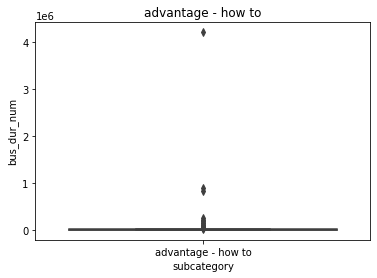

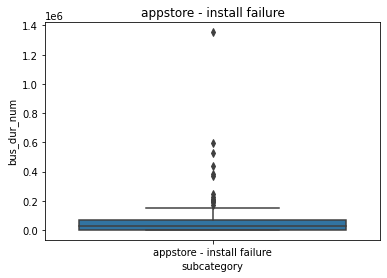

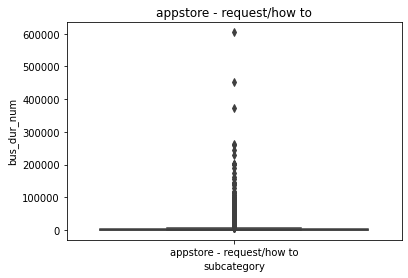

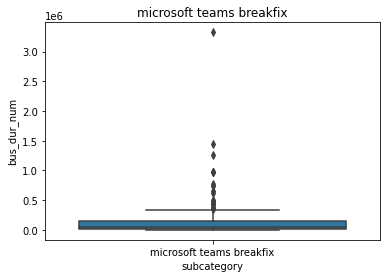

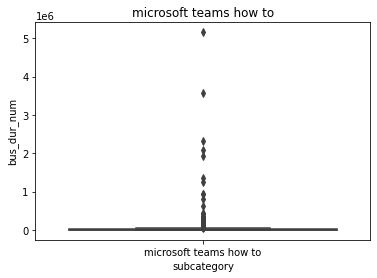

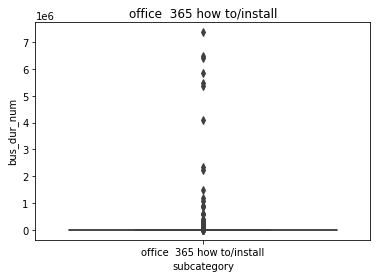

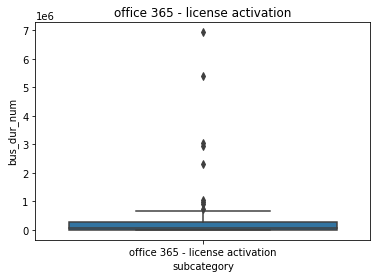

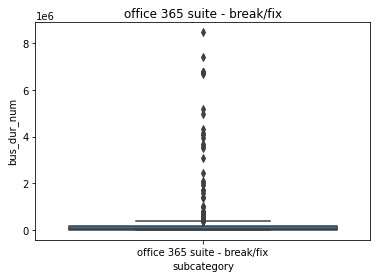

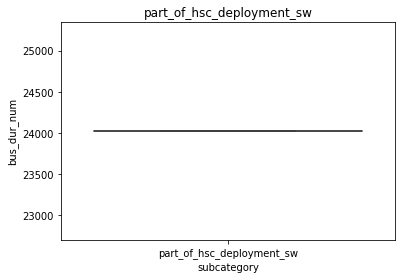

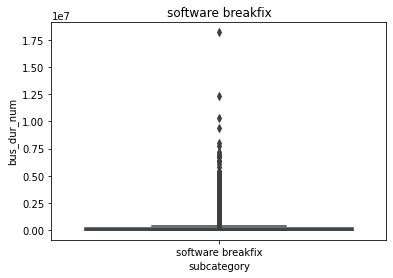

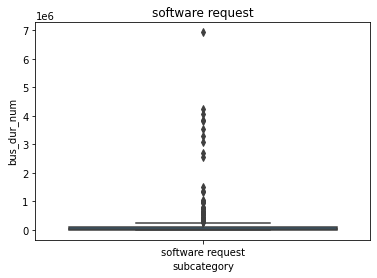

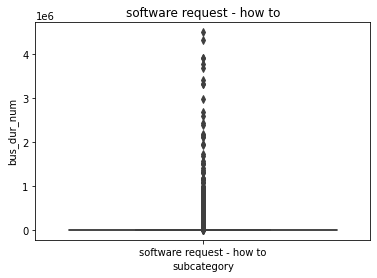

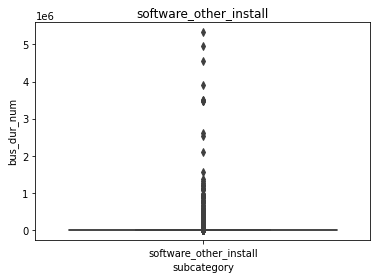

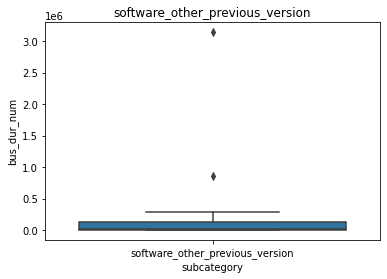

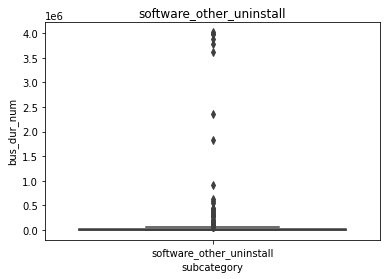

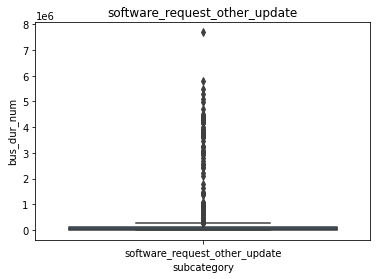

In [ ]:
tmp = a_data[a_data['category'] == selcat[1]]
cat = selcat[1]

categories = np.unique(tmp['subcategory'])
categories = np.delete(categories, np.where(categories == 'nan'))
categories

sout_count1 = {}
sout_count_norm1 = {}


print('BOXPLOTS FOR SUBCATEGORIES WITHIN {}'.format(selcat[1]))
for n in categories:
  a = tmp[tmp['subcategory']== n]
  plt.figure(n)
  sns.boxplot(x='subcategory', y="bus_dur_num", data=a).set_title(n)
  outliers = [y for stat in boxplot_stats(a['bus_dur_num']) for y in stat['fliers']]
  sout_count1[n] = len(outliers)
  sout_count_norm1[n] = (len(outliers)/len(a))*100

  #calculate quartiles to pull outliers
  q1 = a.bus_dur_num.quantile(0.25)
  q3 = a.bus_dur_num.quantile(0.75)
  iqr = q3 - q1
  fence_high = q3 + (1.5*iqr)

  subcat_out1 = a[a['bus_dur_num'] > fence_high]
  #sout_agg = pd.concat([sout_agg,outliers])

BOXPLOTS FOR SUBCATEGORIES WITHIN application-issue/request


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too

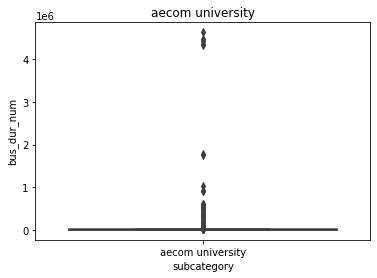

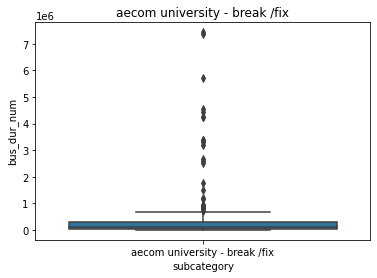

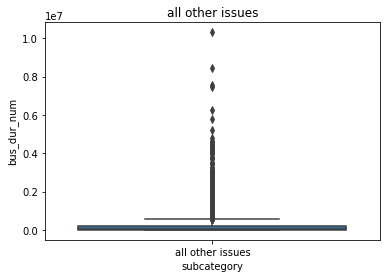

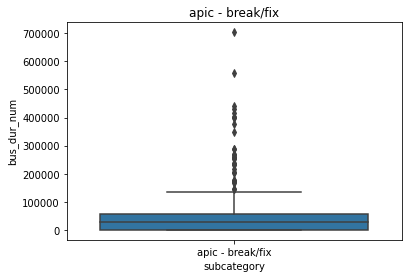

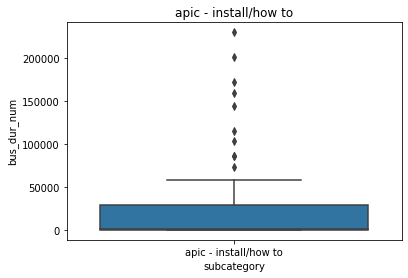

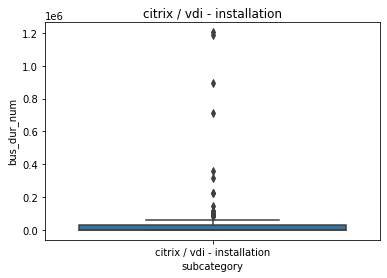

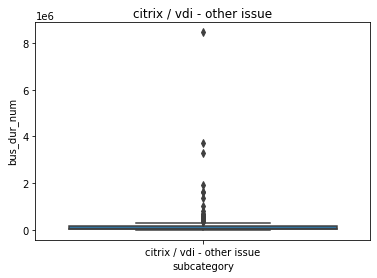

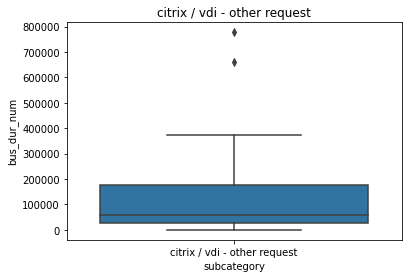

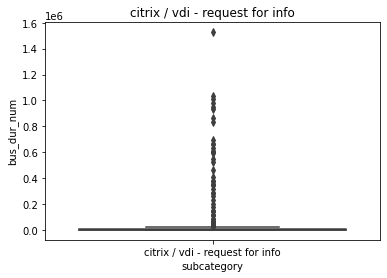

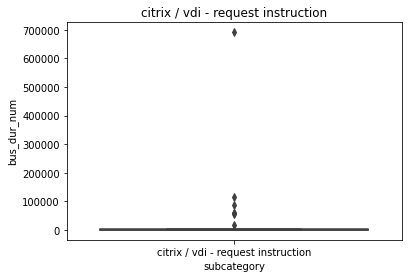

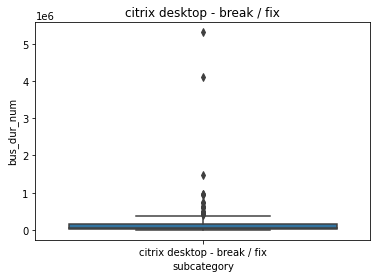

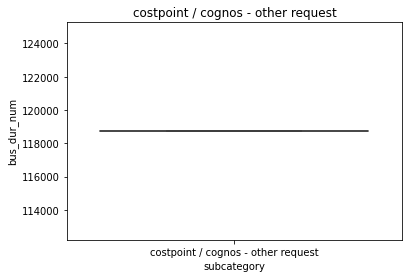

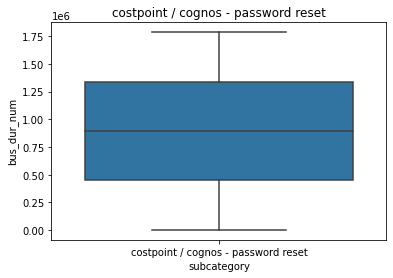

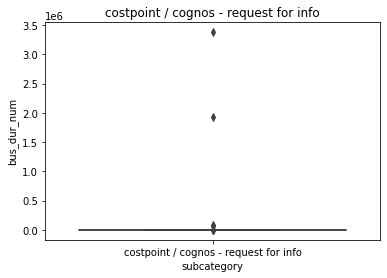

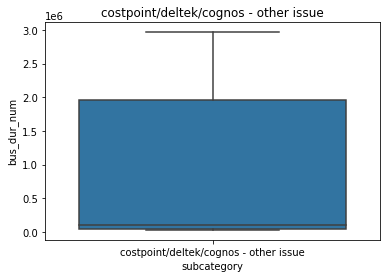

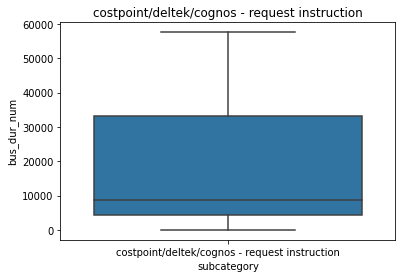

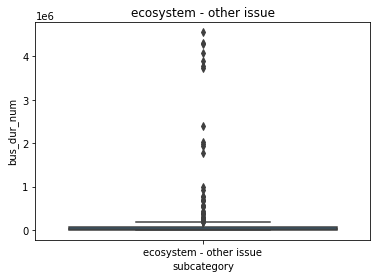

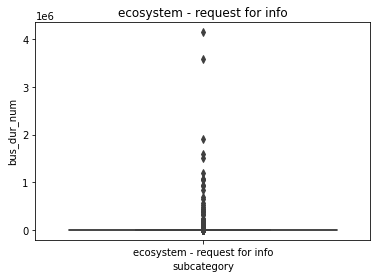

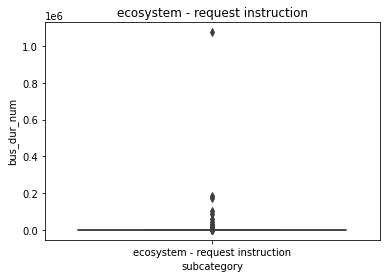

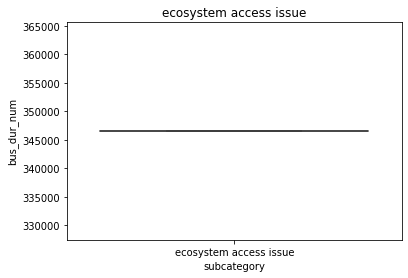

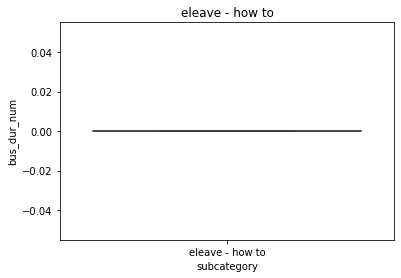

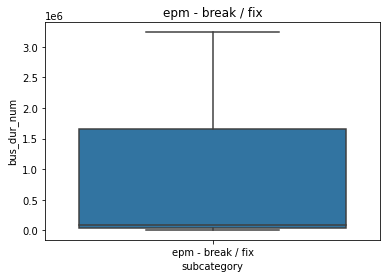

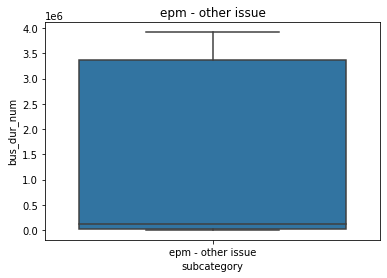

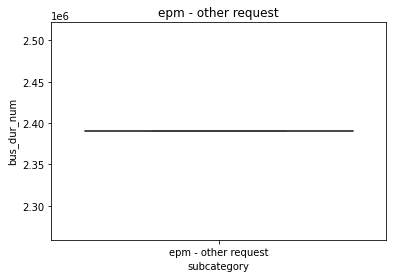

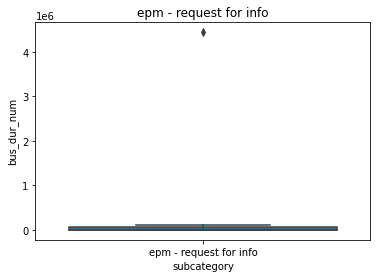

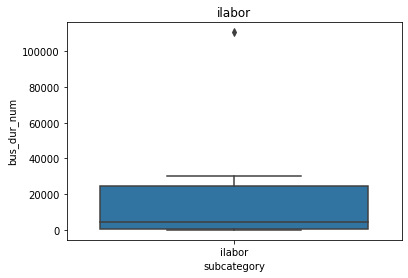

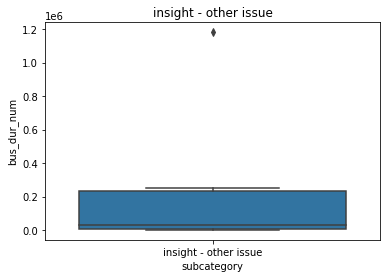

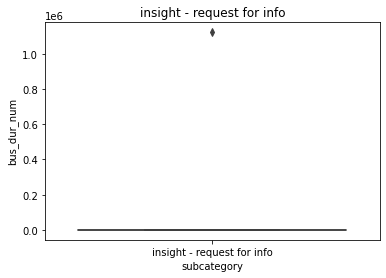

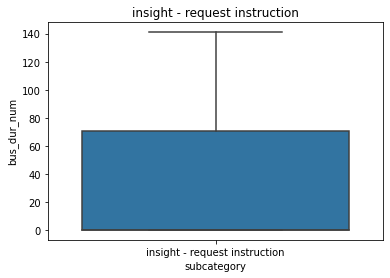

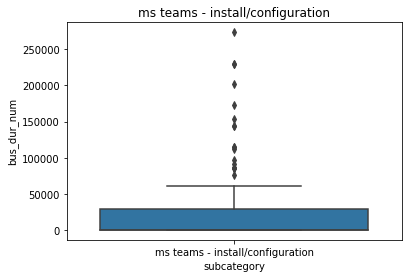

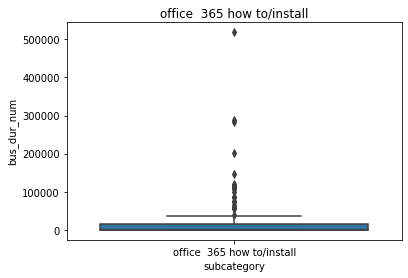

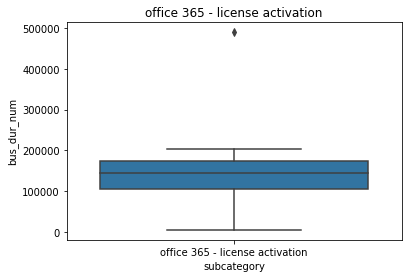

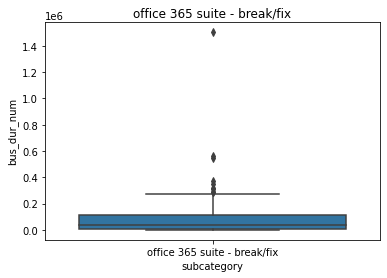

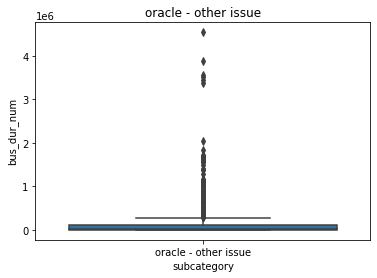

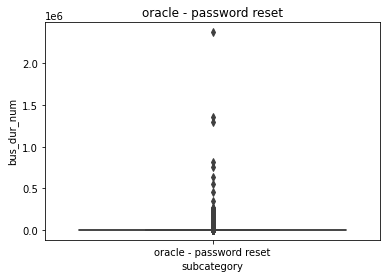

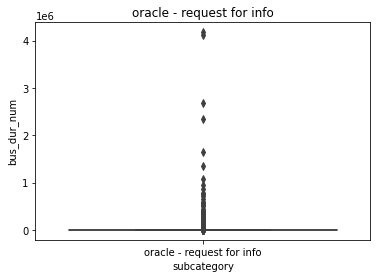

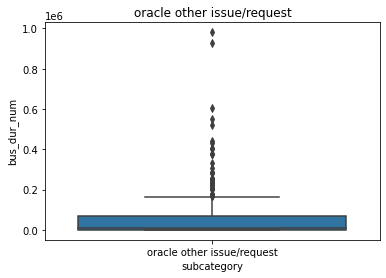

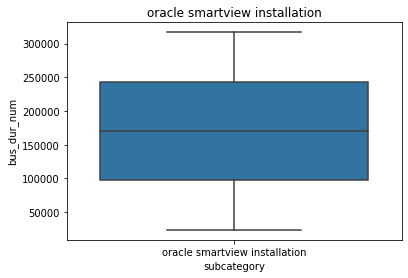

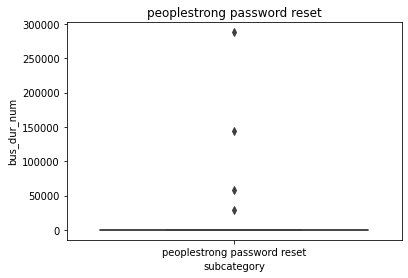

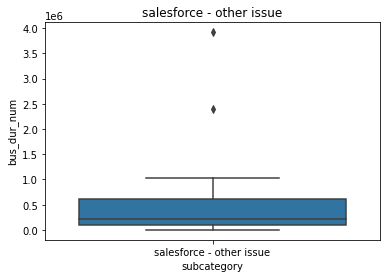

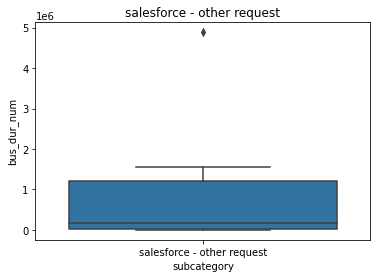

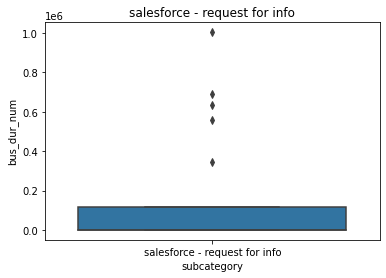

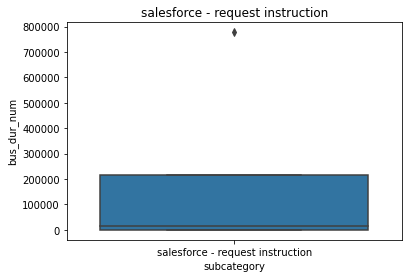

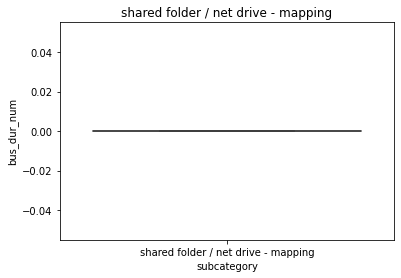

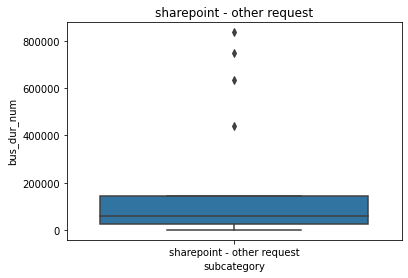

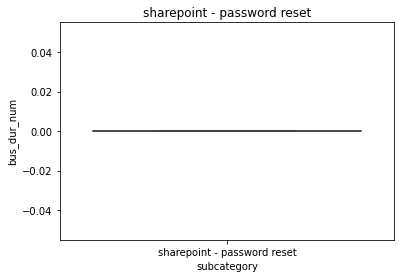

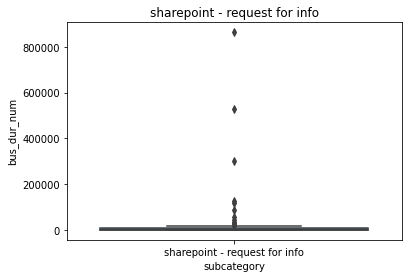

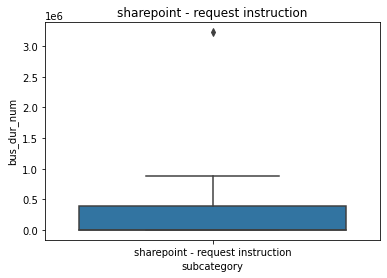

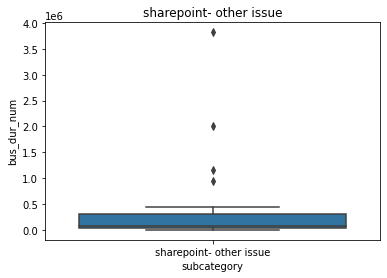

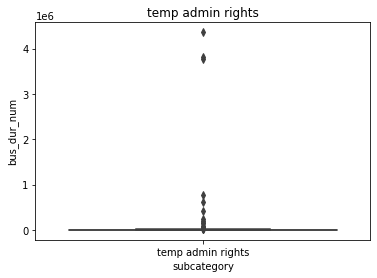

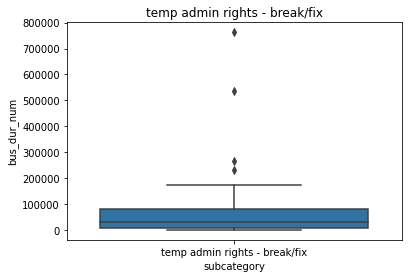

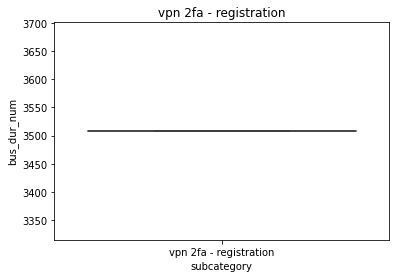

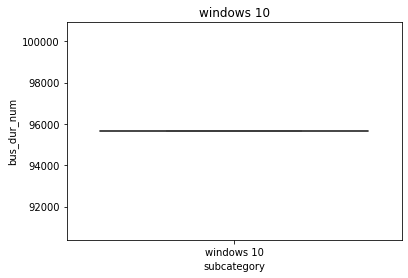

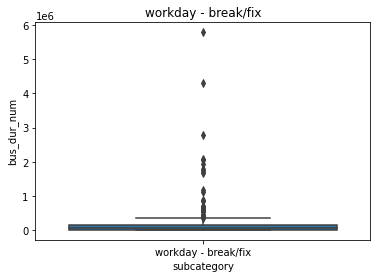

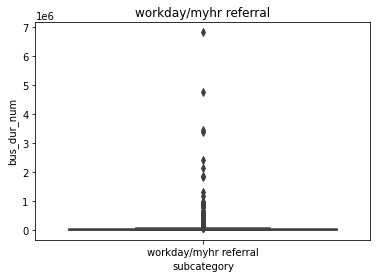

In [ ]:
tmp = a_data[a_data['category'] == selcat[2]]
cat = selcat[2]

categories = np.unique(tmp['subcategory'])
categories = np.delete(categories, np.where(categories == 'nan'))
categories

sout_count2 = {}
sout_count_norm2 = {}


print('BOXPLOTS FOR SUBCATEGORIES WITHIN {}'.format(selcat[2]))
for n in categories:
  a = tmp[tmp['subcategory']== n]
  plt.figure(n)
  sns.boxplot(x='subcategory', y="bus_dur_num", data=a).set_title(n)
  outliers = [y for stat in boxplot_stats(a['bus_dur_num']) for y in stat['fliers']]
  sout_count2[n] = len(outliers)
  sout_count_norm2[n] = (len(outliers)/len(a))*100

  #calculate quartiles to pull outliers
  q1 = a.bus_dur_num.quantile(0.25)
  q3 = a.bus_dur_num.quantile(0.75)
  iqr = q3 - q1
  fence_high = q3 + (1.5*iqr)

  subcat_out2 = a[a['bus_dur_num'] > fence_high]
  #sout_agg = pd.concat([sout_agg,outliers])

BOXPLOTS FOR SUBCATEGORIES WITHIN general


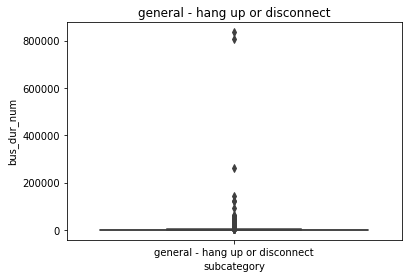

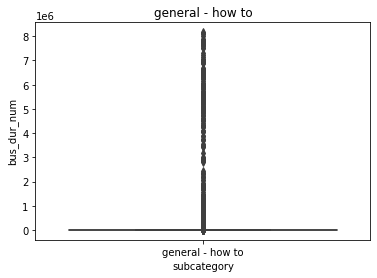

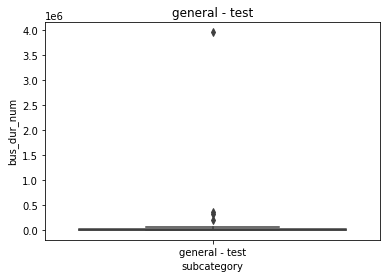

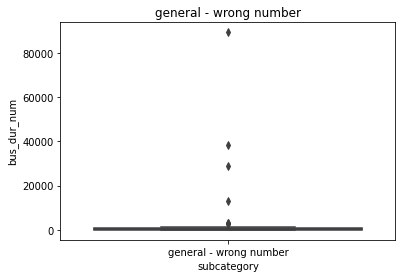

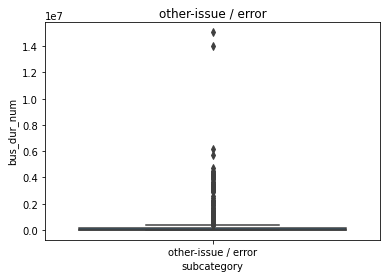

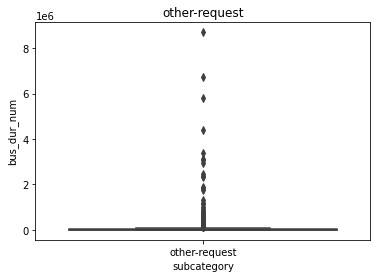

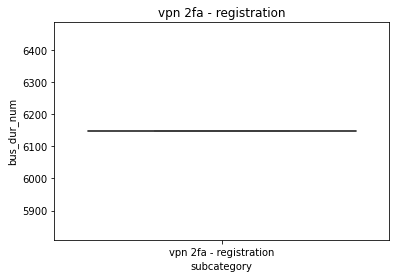

In [ ]:
tmp = a_data[a_data['category'] == selcat[3]]
cat = selcat[3]

categories = np.unique(tmp['subcategory'])
categories = np.delete(categories, np.where(categories == 'nan'))
categories

sout_count3 = {}
sout_count_norm3 = {}


print('BOXPLOTS FOR SUBCATEGORIES WITHIN {}'.format(selcat[3]))
for n in categories:
  a = tmp[tmp['subcategory']== n]
  plt.figure(n)
  sns.boxplot(x='subcategory', y="bus_dur_num", data=a).set_title(n)
  outliers = [y for stat in boxplot_stats(a['bus_dur_num']) for y in stat['fliers']]
  sout_count3[n] = len(outliers)
  sout_count_norm3[n] = (len(outliers)/len(a))*100

  #calculate quartiles to pull outliers
  q1 = a.bus_dur_num.quantile(0.25)
  q3 = a.bus_dur_num.quantile(0.75)
  iqr = q3 - q1
  fence_high = q3 + (1.5*iqr)

  subcat_out3 = a[a['bus_dur_num'] > fence_high]
  #sout_agg = pd.concat([sout_agg,outliers])

BOXPLOTS FOR SUBCATEGORIES WITHIN email


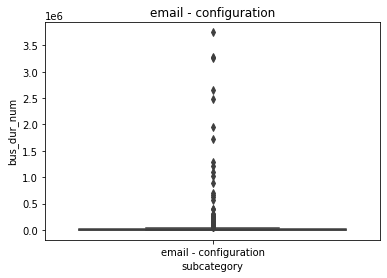

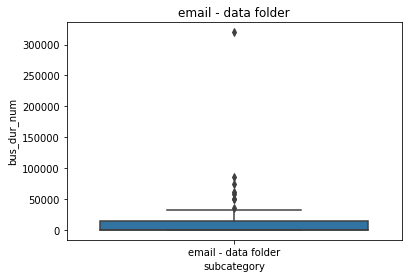

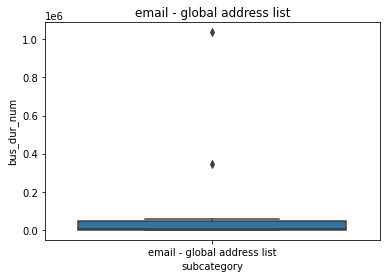

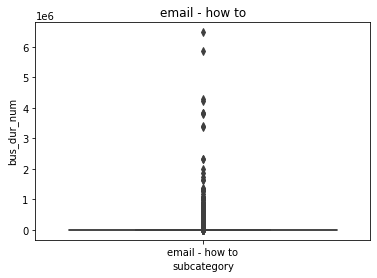

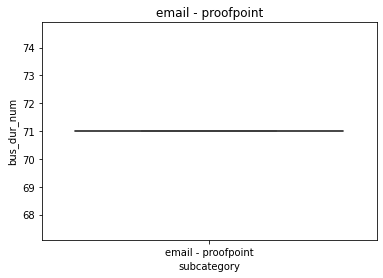

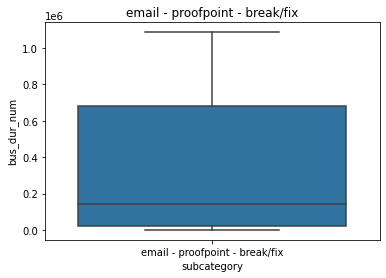

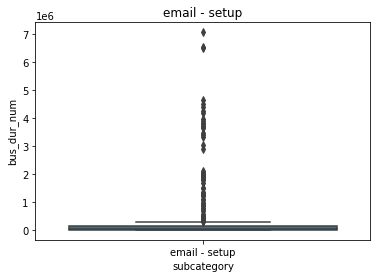

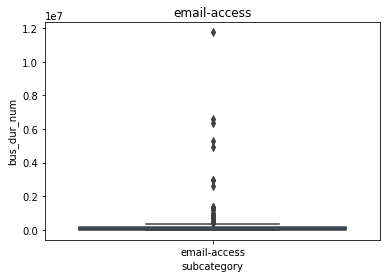

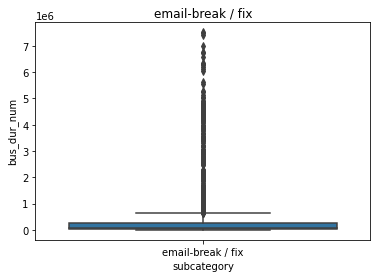

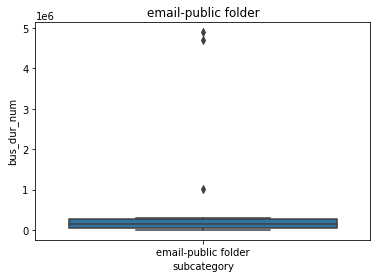

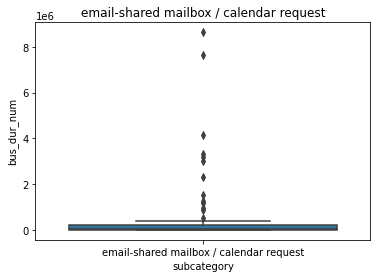

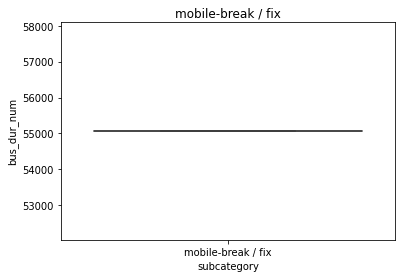

In [ ]:
tmp = a_data[a_data['category'] == selcat[4]]
cat = selcat[4]

categories = np.unique(tmp['subcategory'])
categories = np.delete(categories, np.where(categories == 'nan'))
categories

sout_count4 = {}
sout_count_norm4 = {}


print('BOXPLOTS FOR SUBCATEGORIES WITHIN {}'.format(selcat[4]))
for n in categories:
  a = tmp[tmp['subcategory']== n]
  plt.figure(n)
  sns.boxplot(x='subcategory', y="bus_dur_num", data=a).set_title(n)
  outliers = [y for stat in boxplot_stats(a['bus_dur_num']) for y in stat['fliers']]
  sout_count4[n] = len(outliers)
  sout_count_norm4[n] = (len(outliers)/len(a))*100

  #calculate quartiles to pull outliers
  q1 = a.bus_dur_num.quantile(0.25)
  q3 = a.bus_dur_num.quantile(0.75)
  iqr = q3 - q1
  fence_high = q3 + (1.5*iqr)

  subcat_out4 = a[a['bus_dur_num'] > fence_high]
  #sout_agg = pd.concat([sout_agg,outliers])

BOXPLOTS FOR SUBCATEGORIES WITHIN computer hardware


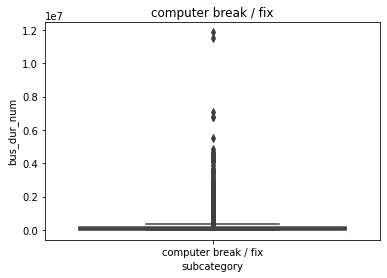

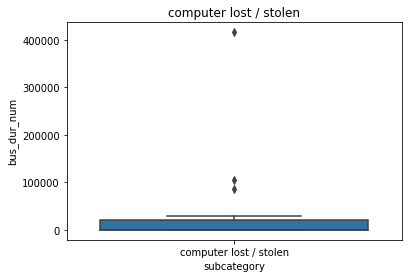

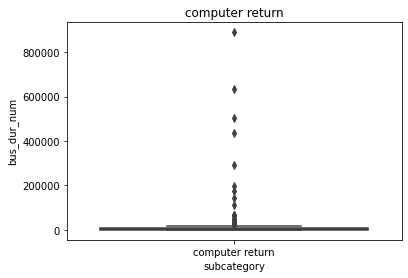

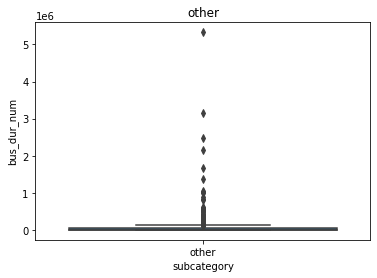

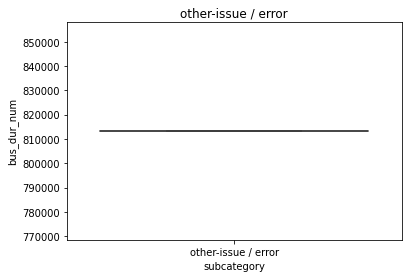

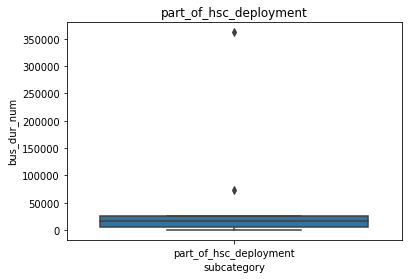

In [ ]:
tmp = a_data[a_data['category'] == selcat[5]]
cat = selcat[5]

categories = np.unique(tmp['subcategory'])
categories = np.delete(categories, np.where(categories == 'nan'))
categories

sout_count5 = {}
sout_count_norm5 = {}


print('BOXPLOTS FOR SUBCATEGORIES WITHIN {}'.format(selcat[5]))
for n in categories:
  a = tmp[tmp['subcategory']== n]
  plt.figure(n)
  sns.boxplot(x='subcategory', y="bus_dur_num", data=a).set_title(n)
  outliers = [y for stat in boxplot_stats(a['bus_dur_num']) for y in stat['fliers']]
  sout_count5[n] = len(outliers)
  sout_count_norm5[n] = (len(outliers)/len(a))*100

  #calculate quartiles to pull outliers
  q1 = a.bus_dur_num.quantile(0.25)
  q3 = a.bus_dur_num.quantile(0.75)
  iqr = q3 - q1
  fence_high = q3 + (1.5*iqr)

  subcat_out5 = a[a['bus_dur_num'] > fence_high]
  #sout_agg = pd.concat([sout_agg,outliers])

In [ ]:
sout_count = dict( sorted(sout_count.items(), key=operator.itemgetter(1),reverse=True))
sout_count_norm = dict( sorted(sout_count_norm.items(), key=operator.itemgetter(1),reverse=True))
print('OUTLIERS WITHIN {}'.format(selcat[0]))
print(sout_count) #look at what has most outliers to see what's taking inordinate time
print(sout_count_norm)

sout_count1 = dict( sorted(sout_count1.items(), key=operator.itemgetter(1),reverse=True))
sout_count_norm1 = dict( sorted(sout_count_norm1.items(), key=operator.itemgetter(1),reverse=True))
print('OUTLIERS WITHIN {}'.format(selcat[1]))
print(sout_count1) #look at what has most outliers to see what's taking inordinate time
print(sout_count_norm1)

sout_count2 = dict( sorted(sout_count2.items(), key=operator.itemgetter(1),reverse=True))
sout_count_norm2 = dict( sorted(sout_count_norm2.items(), key=operator.itemgetter(1),reverse=True))
print('OUTLIERS WITHIN {}'.format(selcat[2]))
print(sout_count2) #look at what has most outliers to see what's taking inordinate time
print(sout_count_norm2)

sout_count3 = dict( sorted(sout_count3.items(), key=operator.itemgetter(1),reverse=True))
sout_count_norm3 = dict( sorted(sout_count_norm3.items(), key=operator.itemgetter(1),reverse=True))
print('OUTLIERS WITHIN {}'.format(selcat[3]))
print(sout_count3) #look at what has most outliers to see what's taking inordinate time
print(sout_count_norm3)

sout_count4 = dict( sorted(sout_count4.items(), key=operator.itemgetter(1),reverse=True))
sout_count_norm4 = dict( sorted(sout_count_norm4.items(), key=operator.itemgetter(1),reverse=True))
print('OUTLIERS WITHIN {}'.format(selcat[4]))
print(sout_count4) #look at what has most outliers to see what's taking inordinate time
print(sout_count_norm4)

sout_count5 = dict( sorted(sout_count5.items(), key=operator.itemgetter(1),reverse=True))
sout_count_norm5 = dict( sorted(sout_count_norm5.items(), key=operator.itemgetter(1),reverse=True))
print('OUTLIERS WITHIN {}'.format(selcat[5]))
print(sout_count5) #look at what has most outliers to see what's taking inordinate time
print(sout_count_norm5)

OUTLIERS WITHIN access-issue/request
{'active directory - password reset': 1339, 'vpn 2fa - anyconnect how to': 840, 'vpn 2fa - registration': 762, 'vpn - certificate': 606, 'okta self pwd registration': 566, 'active directory - account locked': 551, 'temp admin rights': 490, 'login / password issue': 420, 'active directory - update': 371, 'shared folder / net drive - mapping': 295, 'okta verify enrollment/mfa reset': 210, 'shared folder / net drive - other break / fix': 200, 'shared folder / network drive-break / fix': 187, 'vpn 2fa - access request': 134, 'vpn - globalprotect - install/how to/configuration': 128, 'vpn / 2fa-break/fix': 109, 'vpn / 2fa-set up': 82, 'shared folder / net drive - repair': 70, 'okta self pw reset failed': 67, 'web vpn': 61, 'active directory - account extension': 57, 'active directory - tracking/employee id update': 41, 'vpn 2fa - anyconnect install': 36, 'ecosystem access issue': 32, 'shared folder - file restore': 31, 'okta self pw reset break/fix': 27,

In [ ]:
soutlier_sum = pd.DataFrame.from_dict(sout_count, orient = 'index', columns=['count'])
soutlier_sum['category'] = selcat[0]
soutlier_sum.reset_index(inplace = True)
soutlier_sum = soutlier_sum.rename(columns = {'index':'subcategory'})
soutlier_sum['percentage'] = soutlier_sum['subcategory'].map(sout_count_norm)
soutlier_sum = soutlier_sum[['category', 'subcategory', 'count', 'percentage']]

soutlier_sum1 = pd.DataFrame.from_dict(sout_count1, orient = 'index', columns=['count'])
soutlier_sum1['category'] = selcat[1]
soutlier_sum1.reset_index(inplace = True)
soutlier_sum1 = soutlier_sum1.rename(columns = {'index':'subcategory'})
soutlier_sum1['percentage'] = soutlier_sum1['subcategory'].map(sout_count_norm1)
soutlier_sum1 = soutlier_sum1[['category', 'subcategory', 'count', 'percentage']]

soutlier_sum2 = pd.DataFrame.from_dict(sout_count2, orient = 'index', columns=['count'])
soutlier_sum2['category'] = selcat[2]
soutlier_sum2.reset_index(inplace = True)
soutlier_sum2 = soutlier_sum2.rename(columns = {'index':'subcategory'})
soutlier_sum2['percentage'] = soutlier_sum2['subcategory'].map(sout_count_norm2)
soutlier_sum2 = soutlier_sum2[['category', 'subcategory', 'count', 'percentage']]

soutlier_sum3 = pd.DataFrame.from_dict(sout_count3, orient = 'index', columns=['count'])
soutlier_sum3['category'] = selcat[3]
soutlier_sum3.reset_index(inplace = True)
soutlier_sum3 = soutlier_sum3.rename(columns = {'index':'subcategory'})
soutlier_sum3['percentage'] = soutlier_sum3['subcategory'].map(sout_count_norm3)
soutlier_sum3 = soutlier_sum3[['category', 'subcategory', 'count', 'percentage']]

soutlier_sum4 = pd.DataFrame.from_dict(sout_count4, orient = 'index', columns=['count'])
soutlier_sum4['category'] = selcat[4]
soutlier_sum4.reset_index(inplace = True)
soutlier_sum4 = soutlier_sum4.rename(columns = {'index':'subcategory'})
soutlier_sum4['percentage'] = soutlier_sum4['subcategory'].map(sout_count_norm4)
soutlier_sum4 = soutlier_sum4[['category', 'subcategory', 'count', 'percentage']]

soutlier_sum5 = pd.DataFrame.from_dict(sout_count5, orient = 'index', columns=['count'])
soutlier_sum5['category'] = selcat[5]
soutlier_sum5.reset_index(inplace = True)
soutlier_sum5 = soutlier_sum5.rename(columns = {'index':'subcategory'})
soutlier_sum5['percentage'] = soutlier_sum5['subcategory'].map(sout_count_norm5)
soutlier_sum5 = soutlier_sum5[['category', 'subcategory', 'count', 'percentage']]



sub_outliers = pd.concat([soutlier_sum, soutlier_sum1, soutlier_sum2, soutlier_sum3, soutlier_sum4, soutlier_sum5])
sub_outliers



,category,subcategory,count,percentage
0,access-issue/request,active directory - password reset,1339,20.168700
1,access-issue/request,vpn 2fa - anyconnect how to,840,18.510357
2,access-issue/request,vpn 2fa - registration,762,18.365871
3,access-issue/request,vpn - certificate,606,19.336311
4,access-issue/request,okta self pwd registration,566,18.094629
...,...,...,...,...
1,computer hardware,other,73,11.947627
2,computer hardware,computer return,20,21.978022
3,computer hardware,computer lost / stolen,3,17.647059
4,computer hardware,part_of_hsc_deployment,2,20.000000


In [ ]:
sub_outliers_sorted = sub_outliers.sort_values(['count', 'percentage'], ascending=[False, False])
sub_outliers_sorted_a = sub_outliers_sorted
sub_outliers_sorted_a

,category,subcategory,count,percentage
0,software,software breakfix,1389,13.291866
0,access-issue/request,active directory - password reset,1339,20.168700
1,access-issue/request,vpn 2fa - anyconnect how to,840,18.510357
2,access-issue/request,vpn 2fa - registration,762,18.365871
3,access-issue/request,vpn - certificate,606,19.336311
...,...,...,...,...
6,general,vpn 2fa - registration,0,0.000000
9,email,email - proofpoint,0,0.000000
10,email,email - proofpoint - break/fix,0,0.000000
11,email,mobile-break / fix,0,0.000000


In [ ]:
agg_out = pd.concat([subcat_out0, subcat_out1, subcat_out2, subcat_out3, subcat_out4, subcat_out5])
agg_out

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,assignment_group,number,state,priority,short_description,description,comments_and_work_notes,work_notes,close_notes,location,sys_created_on,closed_at,u_initial_response_sla_completed,bus_dur_num,cal_dur_num,reassignment_count,sys_mod_count,assigned_to,closed_by,contact_type,sys_created_by,sla_due,u_task_number_flag,sys_class_name,sys_updated_on,sys_updated_by,urgency,work_start,opened_at,active,comments,closed_by.average_daily_fte,closed_by.city,activity_due,approval,location.city,impact,knowledge,u_reason_to_hold,location.country,location.u_location_id,location.state,location.u_region,u_actual_category,u_actual_subcategory,u_cause,u_cause_code,u_qs_fcresolve,u_misrouted,due_date,sys_domain,task_effective_number,TicketDuration,CalendarDuration,BusinessDuration,category,subcategory,outlier
3238,3340,3454,3461,I-ACM-SD Self Serv,INC1475831,Closed,P4,cannot access workday,user contacted as not able to access workday through myecosystem\r\ntook remote\r\nchecked the same\r\nuser asked if he can access workday from non aecom laptop \r\ninformed user he cannot use wor...,10-08-2020 13:51:21 - Asmita Yadav (Work notes)\nlost the bomgar chat hence not able to paste the notes of the same\n\n10-08-2020 13:50:53 - Asmita Yadav (Work notes)\nrobert romero\r\n9:16pm\r\nC...,10-08-2020 13:51:21 - Asmita Yadav (Work notes)\nlost the bomgar chat hence not able to paste the notes of the same\n\n10-08-2020 13:50:53 - Asmita Yadav (Work notes)\nrobert romero\r\n9:16pm\r\nC...,user contacted as not able to access workday through myecosystem took remote checked the same user asked if he can access workday from non aecom laptop informed user he cannot use workday from non...,tampa,2020-10-08 13:50:00,2020-10-15 14:00:00,False,6701,8480,0,3,Asmita Yadav,NaN,Chat,9.0,UNKNOWN,NaN,Incident,2020-10-15 14:00:00,NaN,2,10/8/2020 13:50,2020-10-08 11:30:00,False,NaN,NaN,los angeles,UNKNOWN,Not Yet Requested,tampa,3 - Low,False,NaN,us,NaN,fl,NaN,access-issue/request,web vpn,user contacted as not able to access workday through myecosystem\r\ntook remote\r\nchecked the same\r\nuser asked if he can access workday from non aecom laptop \r\ninformed user he cannot use wor...,Knowledge/training related,True,False,NaN,NaN,NaN,7 days 02:30:00,2:21:20,1:51:41,access-issue/request,web vpn,True
3570,3674,3795,3807,I-ACM-SD L1-India,INC1475014,Closed,P3,global protect web apps not accessible,"description: based in site office - gpvpn.aecom.com no accessible . error message ""can't reach this page""","10-16-2020 03:10:35 - Durga Prasad (Work notes)\nUser is offline.\r\nPhone number missing.\r\nSent email, asked user to try webvpn until the link is restored.\r\nWaiting for users revert - 3rd con...","10-16-2020 03:10:35 - Durga Prasad (Work notes)\nUser is offline.\r\nPhone number missing.\r\nSent email, asked user to try webvpn until the link is restored.\r\nWaiting for users revert - 3rd con...",no revert from user. could not call user since missing phone number. closing the ticket as per followup process.,abu dhabi,2020-10-08 00:10:00,2020-10-26 03:00:00,False,201600,959194,1,27,Durga Prasad,NaN,Self-service,9.0,UNKNOWN,1.0,Incident,2020-10-26 03:00:00,NaN,2,10/8/2020 7:30,2020-10-08 00:10:00,False,10-08-2020 07:02:21 - akhilesh singh (additional comments)\nnote for l1 team: please note that this issue for accessing the oracle site with global vpn is not oracle application issue as oracle is...,NaN,los angeles,UNKNOWN,Not Yet Requested,abu dhabi,2 - Medium,False,3rd contact done,ae,NaN,NaN,NaN,access-issue/request,web vpn,NaN,NaN,False,False,NaN,NaN,NaN,18 days 02:50:00,"11 days, 2:26:34","2 days, 8:00:00",access-issue/request,web vpn,True
4155,4266,4402,4416,I-ACM-SD L1-India,INC1472759,Closed,P4,globalprotect install in mobile and webvpn,the user called in stated user has installed the globalprotect vpn in phone and she followed the steps but getting an error message of certification failure \r\n- guided the user that she can us

## J_DATA

In [5]:
#COMPANY J
#read in data

j_data = pd.read_csv('/content/gdrive/Shareddrives/IST 718 Project/j_cleaned.csv')
j_data.head()

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (3,5,7,9,10,12,14,17,18,19,24,28,29,30,32,34,35,37,38,39,41,42,44,52,53,54,55,56,57,58,59,64,66,67,68,69,71,72,73,74,75,76,77,85) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unnamed: 0,number,opened_at,incident_state,sys_updated_by,category,short_description,caller_id.location,assignment_group,u_time_last_workgroup_first_se,u_resolution_rejected_report,u_resolution_rejected,u_rejected_from_assignedto,u_reject_count,u_last_transfer_time,u_last_incident_state,u_last_assignment_group,u_initial_support_group,u_initial_priority,u_incident_rejected,urgency,sys_mod_count,sys_updated_on,time_worked,u_time_resolved,sys_class_name,u_task_state,state,severity,priority,u_pending_reminder_sent,u_pending_user_last_workgroup_,u_operational_task,u_notify_caller_update,notify,u_new_requirement,made_sla,u_last_service_call_update,u_last_priority,u_last_assignment_time,...,knowledge,sys_domain,sla_due,sys_created_by,sys_created_on,contact_type,u_contact_windows_team,u_contact_unix_team,u_contact_unified_messaging_te,u_contact_network_team,u_contact_foundation_team,u_contact_dba_team,u_contact_client_technology_gr,u_close_code,bus_dur_num,activity_due,active,assigned_to,subcategory,reassignment_count,expected_start,parent,due_date,closed_by,closed_at,work_end,request_item,request,TicketDuration,ExpectedTaskDuration,TaskDuration,CloseWorkDiff,TotalSlaDuration,ULastWorkgroupDuration,TimeFirstTransfer,PendingUserDuration,Pending3rdPartyDuration,CalendarDuration,BusinessDuration,last_service_call_update_datetime
0,0,INC3148753,2020-06-09 20:46:00,Closed,system,Desktop or laptop,\tI have opened laptop refresh for more than 1 month and I have not received any updates.This is the ticket number REQ599157,"Sunnyvale, CA",ONSITE-AMERICAS,2020-06-10 18:45:00,Accepted Resolution,0.0,pthakur,0.0,2020-06-10 15:45:00,6.0,onsite-americas,itco,P3,False,2,6,2020-06-22 03:02:00,0,2020-06-11 17:26:00,Incident,Closed,Closed Complete,3 - Low,P3,False,81659.0,False,Yes,Do not notify,False,True,"Jun 22, 2020 00:02:12 system: Incident automatically closed after 10 days in the Resolved state.",P3,2020-06-10 15:45:00,...,False,global,2020-06-24 05:03:00,neelamvijay,2020-06-09 20:46:00,Self-service,False,False,False,False,False,False,False,Resolved,713708,6/15/2020 18:45,False,ttruong,other,1,NaN,NaN,NaN,NaN,2020-06-22 03:02:00,NaN,NaN,NaN,1 days 20:40:00,NaN,NaN,NaN,2:59:54,2:59:54,18:58:54,22:40:59,0:00:00,"12 days, 6:15:17","8 days, 6:15:08",2020-06-22 00:02:12
1,1,INC2960955,2020-02-04 07:46:00,Closed,system,Easy connect,I can't seem to connect via Pulse anymore with my MAC. This was working just fine yesterday. It is giving me invalid certificate. Are there some instructions I can follow?,"Westford, MA",ONSITE-AMERICAS,2020-02-04 09:55:00,Accepted Resolution,0.0,talmquist,0.0,2020-02-04 07:47:00,6.0,onsite-americas,onsite-americas,P3,False,2,4,2020-02-15 03:03:00,0,2020-02-04 14:18:00,Incident,Closed,Closed Complete,3 - Low,P3,False,0.0,False,Yes,Do not notify,False,True,"Feb 15, 2020 00:03:26 system: Incident automatically closed after 10 days in the Resolved state.",P3,2020-02-04 07:47:00,...,False,global,2020-02-19 13:28:00,talmquist,2020-02-04 07:47:00,Incident Form,False,False,False,False,False,False,False,Resolved,735188,UNKNOWN,False,ccoffee,report an issue,0,NaN,NaN,NaN,NaN,2020-02-15 03:03:00,NaN,NaN,NaN,0 days 06:32:00,NaN,NaN,NaN,6:30:39,2:07:36,0:00:00,0:00:00,0:00:00,"10 days, 19:16:42","8 days, 12:13:08",2020-02-15 00:03:26
2,2,INC3131802,2020-05-27 11:06:00,Closed,system,Desktop or laptop,""" i"" key not working : virtual keyboard works fine","Houston, TX",ONSITE-AMERICAS,2020-05-27 12:43:00,Accepted Resolution,0.0,pthakur,0.0,2020-05-27 12:27:00,4.0,onsite-americas,onsite-americas,P3,False,2,6,2020-06-07 03:02:00,2,2020-06-07 03:02:00,Incident,Closed,Closed Complete,3 - Low,P3,True,915534.0,False,Yes,Do not notify,False,True,"Jun 07, 2020 00:02:12 system: Incident automatically closed after 10 days in the Pending (User) state.",P3,2020-05-27 12:27:00,...,False,global,2020-06-10 18:23:00,pthakur,2020-05-27 12:27:00,Incident Form,False,False,False,False,False,False,False,Cancelled,636783,6/6/2020 12:43,False,tdefranco,deskto

In [6]:
j_data['category'] =  j_data['category'].astype(str)

In [ ]:
#Make some Pareto Plots Source:https://tylermarrs.com/posts/pareto-plot-with-matplotlib/
def pareto_plot(df, x=None, y=None, title=None, show_pct_y=False, pct_format='{0:.0%}'):
    xlabel = x
    ylabel = y
    tmp = df.sort_values(y, ascending=False)
    x = tmp[x].values
    y = tmp[y].values
    weights = y / y.sum()
    cumsum = weights.cumsum()
    cumsum1 = []
    
    for n in cumsum:
      a = round(n)
      cumsum1.append(a)

    
    fig, ax1 = plt.subplots()
    ax1.bar(x, y)
    ax1.set_xlabel(xlabel)
    ax1.set_ylabel(ylabel)

    ax2 = ax1.twinx()
    ax2.plot(x, cumsum1, '-ro', alpha=0.5)
    ax2.set_ylabel('', color='r')
    ax2.tick_params('y', colors='r')
    
    vals = ax2.get_yticks()
    ax2.set_yticklabels(['{:,.2%}'.format(x) for x in vals])

    # hide y-labels on right side
    if not show_pct_y:
        ax2.set_yticks([])
    
    formatted_weights = [pct_format.format(x) for x in cumsum]
    for i, txt in enumerate(formatted_weights):
        ax2.annotate(txt, (x[i], cumsum[i]), fontweight='heavy')    
    
    if title:
        plt.title(title)
    
    plt.tight_layout()
    plt.show()

In [ ]:
'''y = j_data.bus_dur_num.values
weights =  y / y.sum()
cumsum = weights.cumsum()
cumsum1 = []

for n in cumsum:
  a = round(n)
  cumsum1.append(a)

cumsum1'''

'y = j_data.bus_dur_num.values\nweights =  y / y.sum()\ncumsum = weights.cumsum()\ncumsum1 = []\n\nfor n in cumsum:\n  a = round(n)\n  cumsum1.append(a)\n\ncumsum1'

In [ ]:
#pareto_plot(j_data, x='category', y='bus_dur_num', title='Ticket Duration by Assignment Group')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17],
 <a list of 18 Text major ticklabel objects>)

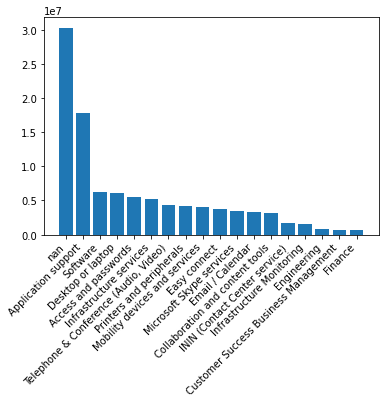

In [10]:
tmp = j_data.sort_values('bus_dur_num', ascending=False)
plt.bar(tmp['category'], tmp['bus_dur_num'])
plt.xticks(rotation=45, ha='right')

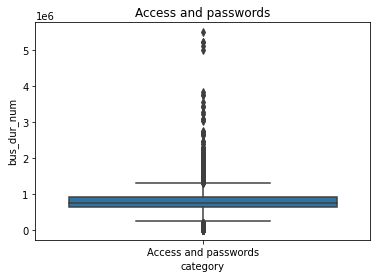

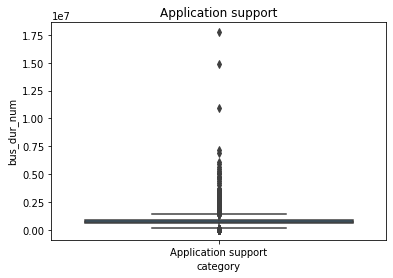

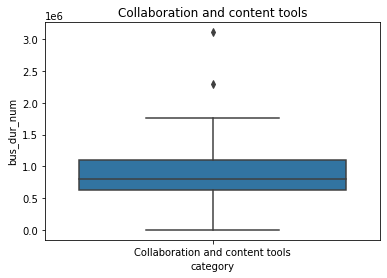

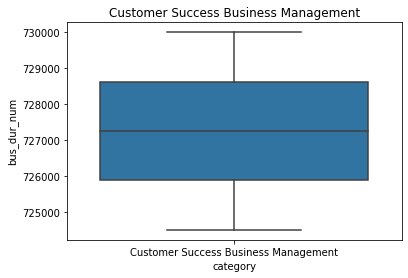

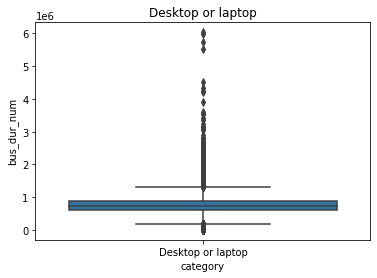

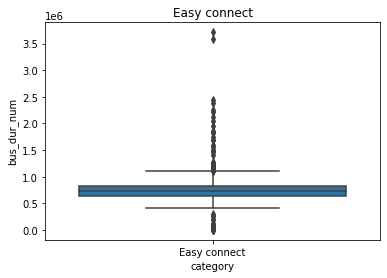

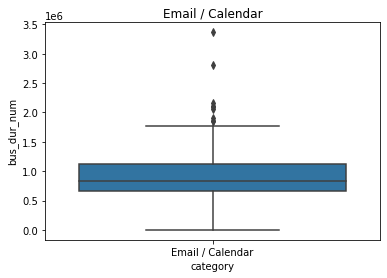

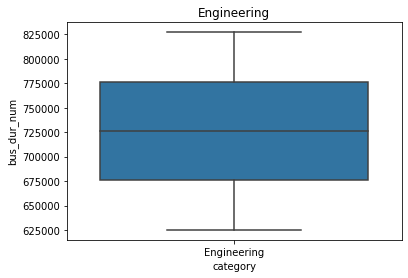

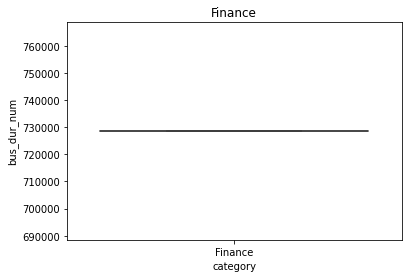

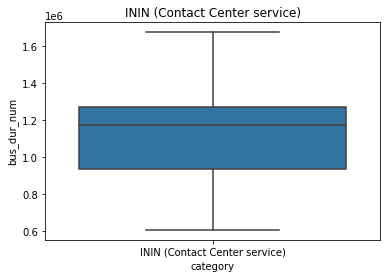

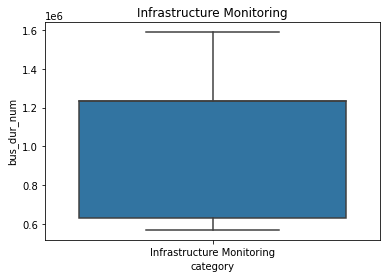

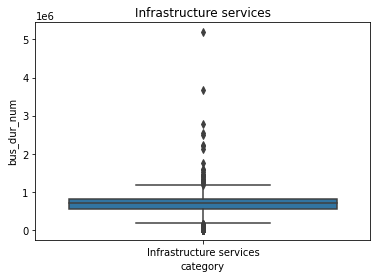

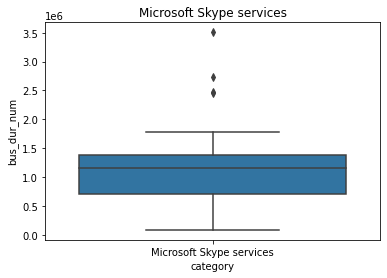

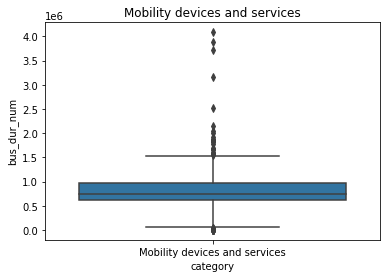

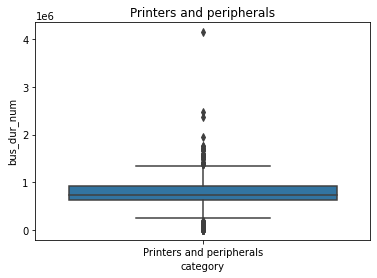

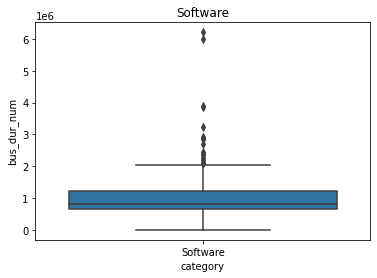

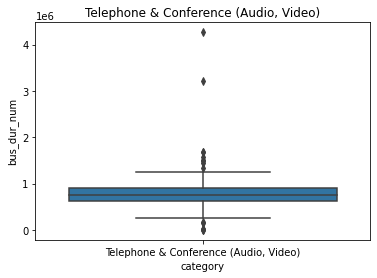

In [ ]:
from matplotlib.cbook import boxplot_stats

categories = np.unique(tmp['category'])
categories = np.delete(categories, np.where(categories == 'nan'))
categories

out_count = {}
out_count_norm = {}
out_agg = pd.DataFrame()

for n in categories:
  a = tmp[tmp['category']== n]
  plt.figure(n)
  sns.boxplot(x='category', y="bus_dur_num", data=a).set_title(n)
  outliers = [y for stat in boxplot_stats(a['bus_dur_num']) for y in stat['fliers']]
  out_count[n] = len(outliers)
  out_count_norm[n] = (len(outliers)/len(a))*100
  #out_agg = pd.concat([out_agg,outliers])



  
  


In [ ]:
import operator
out_count = dict( sorted(out_count.items(), key=operator.itemgetter(1),reverse=True))
out_count_norm = dict( sorted(out_count_norm.items(), key=operator.itemgetter(1),reverse=True))
print(out_count) #look at what has most outliers to see what's taking inordinate time
print(out_count_norm)

j_out = out_agg

#Total Number Outliers
#Desktop/Laptop 526 15%
#Access and passwords 331 15%
#Application Support 311 15%
#Infrastructure services 131  22.7% ***
#Easy connect 60 19%
#Telephone & Conference 15 19%

{'Desktop or laptop': 526, 'Access and passwords': 331, 'Application support': 311, 'Infrastructure services': 131, 'Printers and peripherals': 79, 'Easy connect': 60, 'Mobility devices and services': 48, 'Software': 16, 'Telephone & Conference (Audio, Video)': 15, 'Email / Calendar': 9, 'Microsoft Skype services': 4, 'Collaboration and content tools': 2, 'Customer Success Business Management': 0, 'Engineering': 0, 'Finance': 0, 'ININ (Contact Center service)': 0, 'Infrastructure Monitoring': 0}
{'Infrastructure services': 22.703639514731368, 'Easy connect': 19.35483870967742, 'Telephone & Conference (Audio, Video)': 19.230769230769234, 'Printers and peripherals': 16.666666666666664, 'Access and passwords': 15.28162511542013, 'Application support': 15.252574791564491, 'Desktop or laptop': 15.132336018411968, 'Microsoft Skype services': 14.814814814814813, 'Mobility devices and services': 10.572687224669604, 'Email / Calendar': 8.256880733944955, 'Software': 6.22568093385214, 'Collabora

In [ ]:
outlier_sum = pd.DataFrame.from_dict(out_count, orient = 'index', columns=['count'])
outlier_sum.reset_index(inplace = True)
outlier_sum = outlier_sum.rename(columns = {'index':'category'})
outlier_sum['percentage'] = outlier_sum['category'].map(out_count_norm)

outlier_sum

,category,count,percentage
0,Desktop or laptop,526,15.132336
1,Access and passwords,331,15.281625
2,Application support,311,15.252575
3,Infrastructure services,131,22.703640
4,Printers and peripherals,79,16.666667
5,Easy connect,60,19.354839
6,Mobility devices and services,48,10.572687
7,Software,16,6.225681
8,"Telephone & Conference (Audio, Video)",15,19.230769
9,Email / Calendar,9,8.256881


In [ ]:
#Subcategory search based on selected categories


selcat = ['Desktop or laptop', 'Access and passwords', 'Application support', 'Infrastructure services', 'Easy connect', 'Telephone & Conference (Audio, Video)']


BOXPLOTS FOR SUBCATEGORIES WITHIN Desktop or laptop


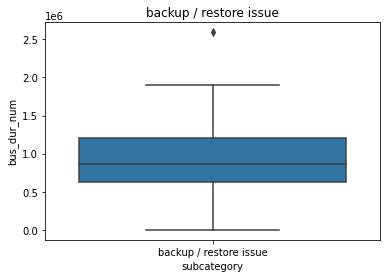

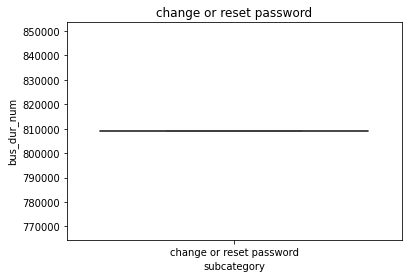

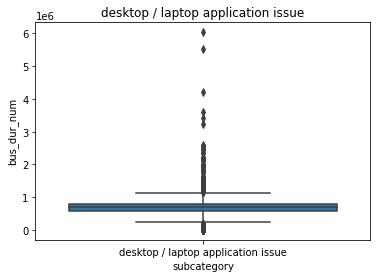

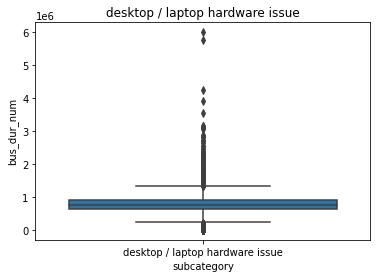

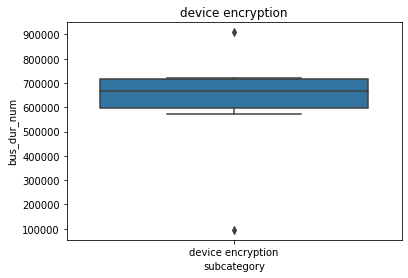

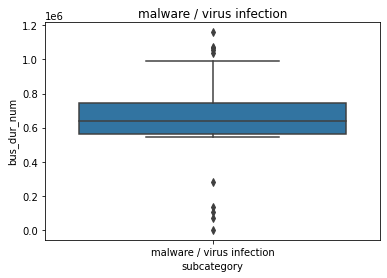

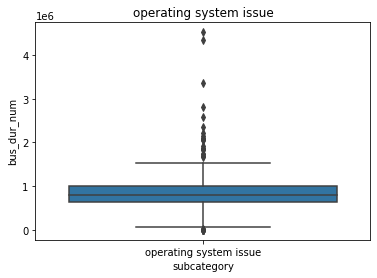

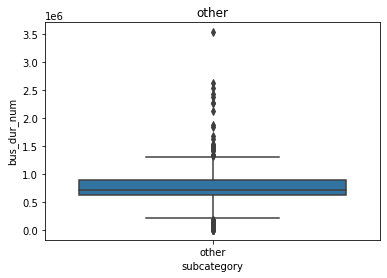

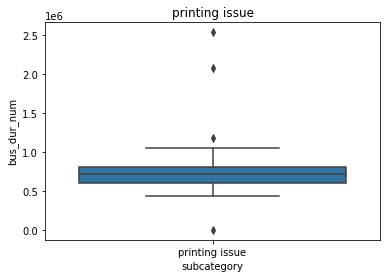

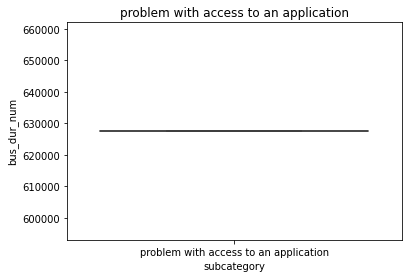

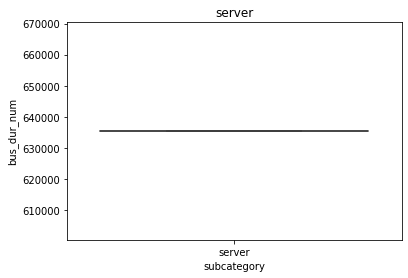

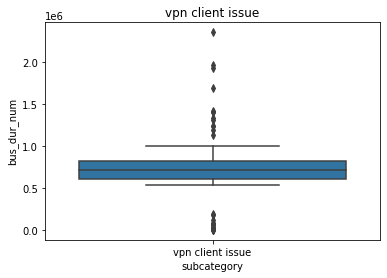

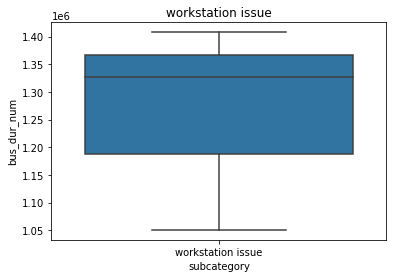

In [ ]:
tmp = j_data[j_data['category'] == selcat[0]]
cat = selcat[0]

categories = np.unique(tmp['subcategory'])
categories = np.delete(categories, np.where(categories == 'nan'))
categories

sout_count = {}
sout_count_norm = {}
sout_agg = pd.DataFrame()

print('BOXPLOTS FOR SUBCATEGORIES WITHIN {}'.format(selcat[0]))
for n in categories:
  a = tmp[tmp['subcategory']== n]
  plt.figure(n)
  sns.boxplot(x='subcategory', y="bus_dur_num", data=a).set_title(n)
  outliers = [y for stat in boxplot_stats(a['bus_dur_num']) for y in stat['fliers']]
  sout_count[n] = len(outliers)
  sout_count_norm[n] = (len(outliers)/len(a))*100

  #calculate quartiles to pull outliers
  q1 = a.bus_dur_num.quantile(0.25)
  q3 = a.bus_dur_num.quantile(0.75)
  iqr = q3 - q1
  fence_high = q3 + (1.5*iqr)

  subcat_out0 = a[a['bus_dur_num'] > fence_high]
  #sout_agg = pd.concat([sout_agg,outliers])


BOXPLOTS FOR SUBCATEGORIES WITHIN Access and passwords


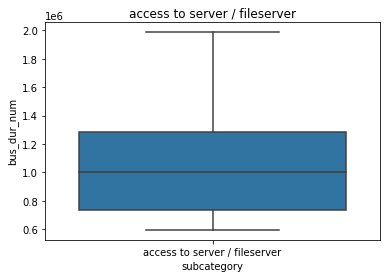

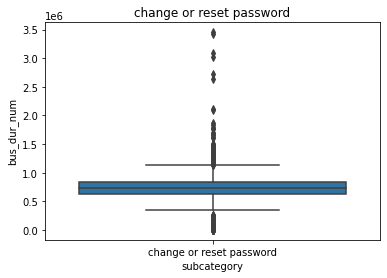

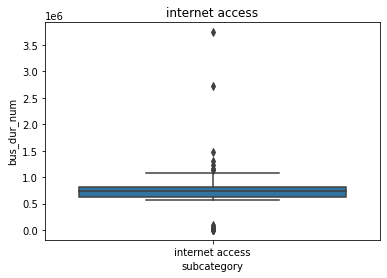

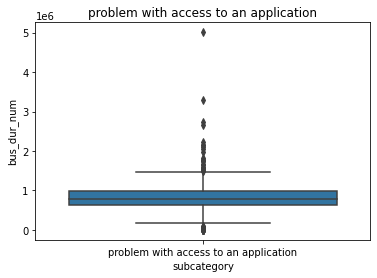

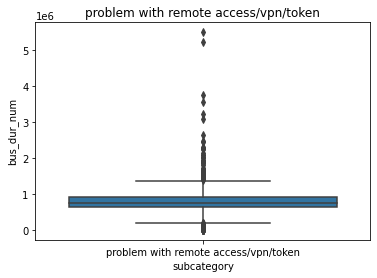

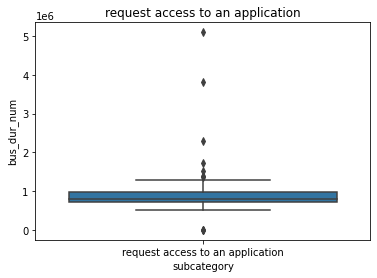

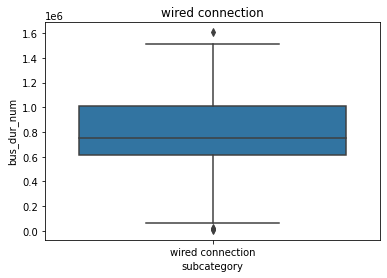

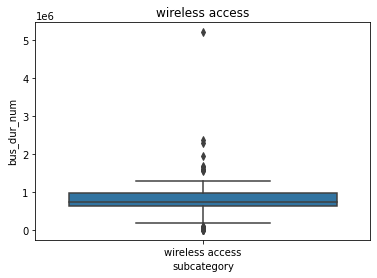

In [ ]:
tmp = j_data[j_data['category'] == selcat[1]]
cat = selcat[1]

categories = np.unique(tmp['subcategory'])
categories = np.delete(categories, np.where(categories == 'nan'))
categories

sout_count1 = {}
sout_count_norm1 = {}


print('BOXPLOTS FOR SUBCATEGORIES WITHIN {}'.format(selcat[1]))
for n in categories:
  a = tmp[tmp['subcategory']== n]
  plt.figure(n)
  sns.boxplot(x='subcategory', y="bus_dur_num", data=a).set_title(n)
  outliers = [y for stat in boxplot_stats(a['bus_dur_num']) for y in stat['fliers']]
  sout_count1[n] = len(outliers)
  sout_count_norm1[n] = (len(outliers)/len(a))*100

  #calculate quartiles to pull outliers
  q1 = a.bus_dur_num.quantile(0.25)
  q3 = a.bus_dur_num.quantile(0.75)
  iqr = q3 - q1
  fence_high = q3 + (1.5*iqr)

  subcat_out1 = a[a['bus_dur_num'] > fence_high]
  #sout_agg = pd.concat([sout_agg,outliers])

BOXPLOTS FOR SUBCATEGORIES WITHIN Application support


/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 128 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 128 missing from current font.
  font.set_text(s, 0, flags=flags)


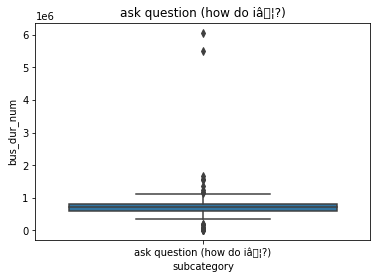

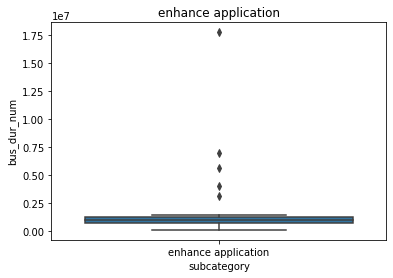

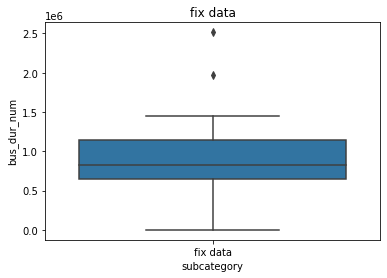

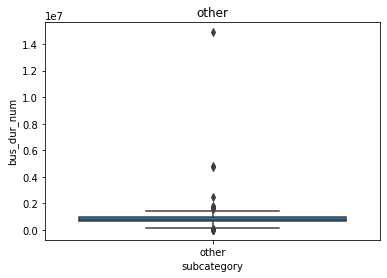

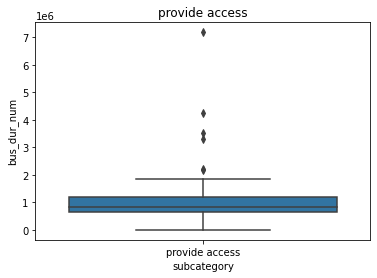

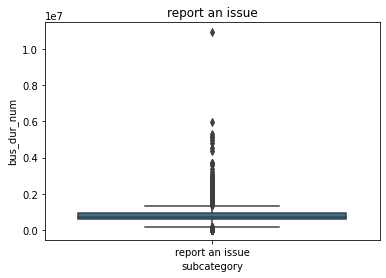

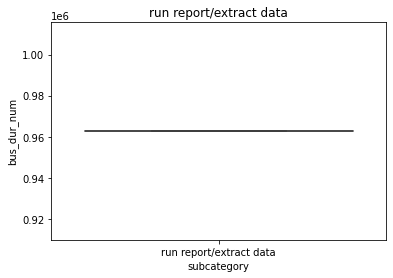

In [ ]:
tmp = j_data[j_data['category'] == selcat[2]]
cat = selcat[2]

categories = np.unique(tmp['subcategory'])
categories = np.delete(categories, np.where(categories == 'nan'))
categories

sout_count2 = {}
sout_count_norm2 = {}


print('BOXPLOTS FOR SUBCATEGORIES WITHIN {}'.format(selcat[2]))
for n in categories:
  a = tmp[tmp['subcategory']== n]
  plt.figure(n)
  sns.boxplot(x='subcategory', y="bus_dur_num", data=a).set_title(n)
  outliers = [y for stat in boxplot_stats(a['bus_dur_num']) for y in stat['fliers']]
  sout_count2[n] = len(outliers)
  sout_count_norm2[n] = (len(outliers)/len(a))*100

  #calculate quartiles to pull outliers
  q1 = a.bus_dur_num.quantile(0.25)
  q3 = a.bus_dur_num.quantile(0.75)
  iqr = q3 - q1
  fence_high = q3 + (1.5*iqr)

  subcat_out2 = a[a['bus_dur_num'] > fence_high]
  #sout_agg = pd.concat([sout_agg,outliers])

BOXPLOTS FOR SUBCATEGORIES WITHIN Infrastructure services


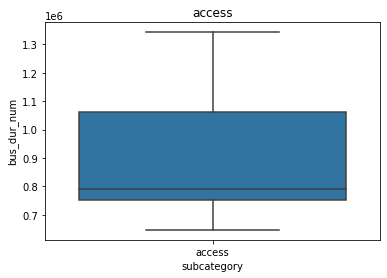

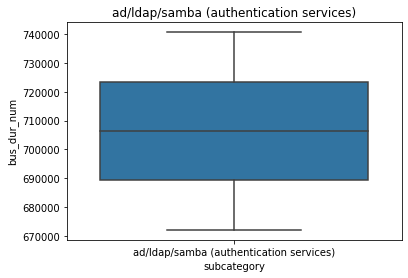

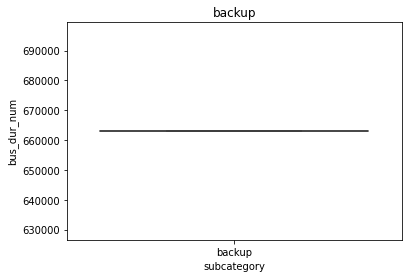

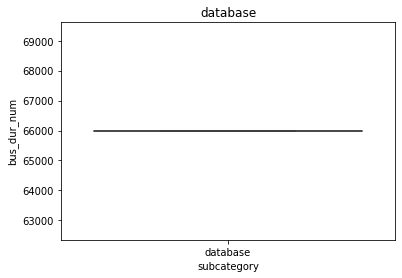

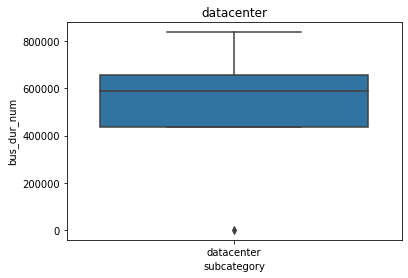

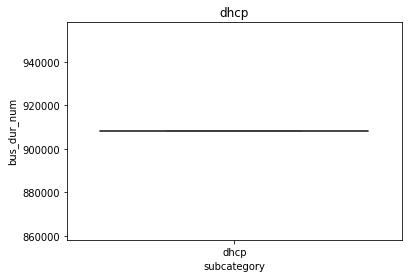

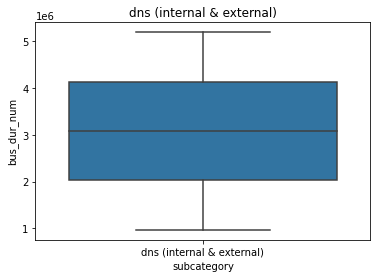

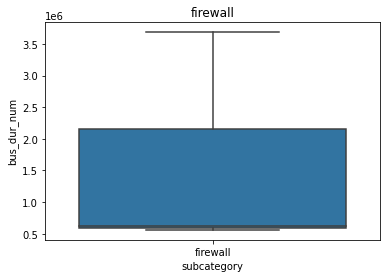

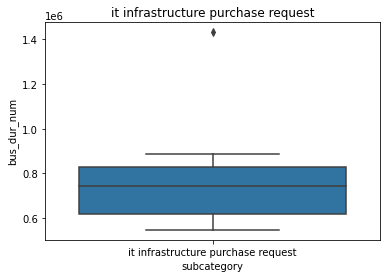

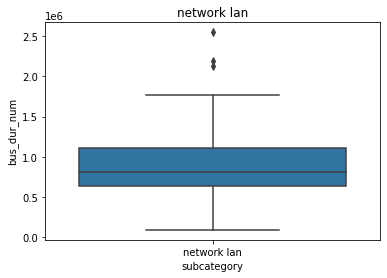

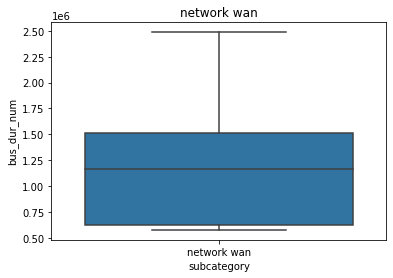

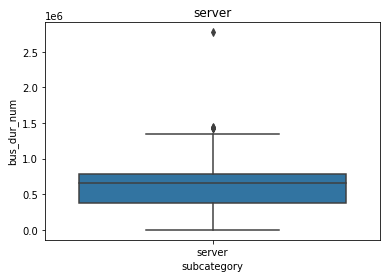

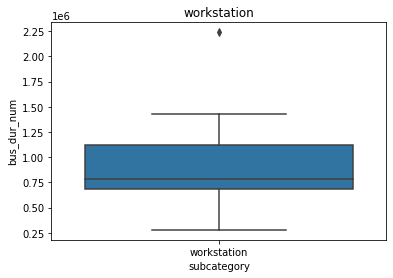

In [ ]:
tmp = j_data[j_data['category'] == selcat[3]]
cat = selcat[3]

categories = np.unique(tmp['subcategory'])
categories = np.delete(categories, np.where(categories == 'nan'))
categories

sout_count3 = {}
sout_count_norm3 = {}


print('BOXPLOTS FOR SUBCATEGORIES WITHIN {}'.format(selcat[3]))
for n in categories:
  a = tmp[tmp['subcategory']== n]
  plt.figure(n)
  sns.boxplot(x='subcategory', y="bus_dur_num", data=a).set_title(n)
  outliers = [y for stat in boxplot_stats(a['bus_dur_num']) for y in stat['fliers']]
  sout_count3[n] = len(outliers)
  sout_count_norm3[n] = (len(outliers)/len(a))*100

  #calculate quartiles to pull outliers
  q1 = a.bus_dur_num.quantile(0.25)
  q3 = a.bus_dur_num.quantile(0.75)
  iqr = q3 - q1
  fence_high = q3 + (1.5*iqr)

  subcat_out3 = a[a['bus_dur_num'] > fence_high]
  #sout_agg = pd.concat([sout_agg,outliers])

BOXPLOTS FOR SUBCATEGORIES WITHIN Easy connect


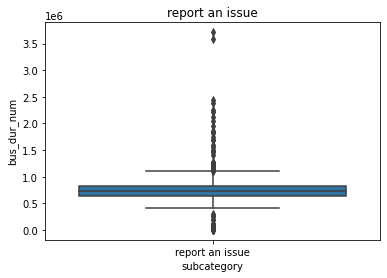

In [ ]:
tmp = j_data[j_data['category'] == selcat[4]]
cat = selcat[4]

categories = np.unique(tmp['subcategory'])
categories = np.delete(categories, np.where(categories == 'nan'))
categories

sout_count4 = {}
sout_count_norm4 = {}


print('BOXPLOTS FOR SUBCATEGORIES WITHIN {}'.format(selcat[4]))
for n in categories:
  a = tmp[tmp['subcategory']== n]
  plt.figure(n)
  sns.boxplot(x='subcategory', y="bus_dur_num", data=a).set_title(n)
  outliers = [y for stat in boxplot_stats(a['bus_dur_num']) for y in stat['fliers']]
  sout_count4[n] = len(outliers)
  sout_count_norm4[n] = (len(outliers)/len(a))*100

  #calculate quartiles to pull outliers
  q1 = a.bus_dur_num.quantile(0.25)
  q3 = a.bus_dur_num.quantile(0.75)
  iqr = q3 - q1
  fence_high = q3 + (1.5*iqr)

  subcat_out4 = a[a['bus_dur_num'] > fence_high]
  #sout_agg = pd.concat([sout_agg,outliers])

BOXPLOTS FOR SUBCATEGORIES WITHIN Telephone & Conference (Audio, Video)


/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 128 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 147 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 128 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 147 missing from current font.
  font.set_text(s, 0, flags=flags)


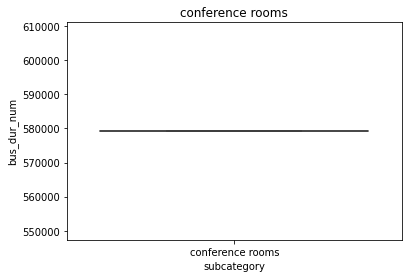

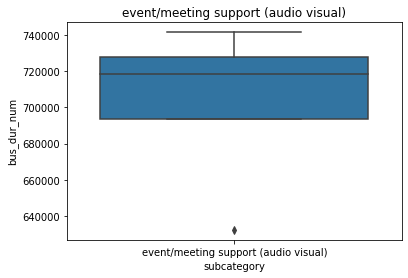

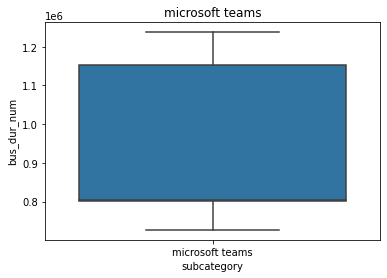

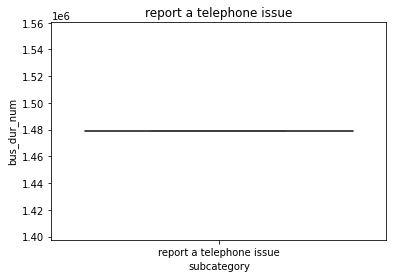

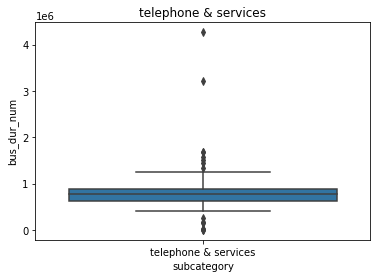

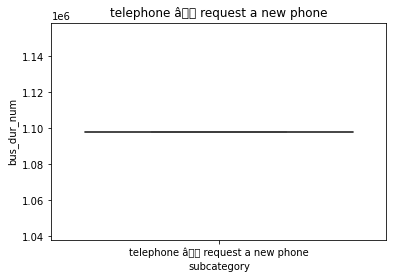

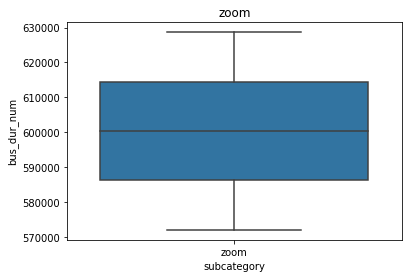

In [ ]:
tmp = j_data[j_data['category'] == selcat[5]]
cat = selcat[5]

categories = np.unique(tmp['subcategory'])
categories = np.delete(categories, np.where(categories == 'nan'))
categories

sout_count5 = {}
sout_count_norm5 = {}


print('BOXPLOTS FOR SUBCATEGORIES WITHIN {}'.format(selcat[5]))
for n in categories:
  a = tmp[tmp['subcategory']== n]
  plt.figure(n)
  sns.boxplot(x='subcategory', y="bus_dur_num", data=a).set_title(n)
  outliers = [y for stat in boxplot_stats(a['bus_dur_num']) for y in stat['fliers']]
  sout_count5[n] = len(outliers)
  sout_count_norm5[n] = (len(outliers)/len(a))*100

  #calculate quartiles to pull outliers
  q1 = a.bus_dur_num.quantile(0.25)
  q3 = a.bus_dur_num.quantile(0.75)
  iqr = q3 - q1
  fence_high = q3 + (1.5*iqr)

  subcat_out5 = a[a['bus_dur_num'] > fence_high]
  #sout_agg = pd.concat([sout_agg,outliers])

In [ ]:
sout_count = dict( sorted(sout_count.items(), key=operator.itemgetter(1),reverse=True))
sout_count_norm = dict( sorted(sout_count_norm.items(), key=operator.itemgetter(1),reverse=True))
print('OUTLIERS WITHIN {}'.format(selcat[0]))
print(sout_count) #look at what has most outliers to see what's taking inordinate time
print(sout_count_norm)

sout_count1 = dict( sorted(sout_count1.items(), key=operator.itemgetter(1),reverse=True))
sout_count_norm1 = dict( sorted(sout_count_norm1.items(), key=operator.itemgetter(1),reverse=True))
print('OUTLIERS WITHIN {}'.format(selcat[1]))
print(sout_count1) #look at what has most outliers to see what's taking inordinate time
print(sout_count_norm1)

sout_count2 = dict( sorted(sout_count2.items(), key=operator.itemgetter(1),reverse=True))
sout_count_norm2 = dict( sorted(sout_count_norm2.items(), key=operator.itemgetter(1),reverse=True))
print('OUTLIERS WITHIN {}'.format(selcat[2]))
print(sout_count2) #look at what has most outliers to see what's taking inordinate time
print(sout_count_norm2)

sout_count3 = dict( sorted(sout_count3.items(), key=operator.itemgetter(1),reverse=True))
sout_count_norm3 = dict( sorted(sout_count_norm3.items(), key=operator.itemgetter(1),reverse=True))
print('OUTLIERS WITHIN {}'.format(selcat[3]))
print(sout_count3) #look at what has most outliers to see what's taking inordinate time
print(sout_count_norm3)

sout_count4 = dict( sorted(sout_count4.items(), key=operator.itemgetter(1),reverse=True))
sout_count_norm4 = dict( sorted(sout_count_norm4.items(), key=operator.itemgetter(1),reverse=True))
print('OUTLIERS WITHIN {}'.format(selcat[4]))
print(sout_count4) #look at what has most outliers to see what's taking inordinate time
print(sout_count_norm4)

sout_count5 = dict( sorted(sout_count5.items(), key=operator.itemgetter(1),reverse=True))
sout_count_norm5 = dict( sorted(sout_count_norm5.items(), key=operator.itemgetter(1),reverse=True))
print('OUTLIERS WITHIN {}'.format(selcat[5]))
print(sout_count5) #look at what has most outliers to see what's taking inordinate time
print(sout_count_norm5)

OUTLIERS WITHIN Desktop or laptop
{'desktop / laptop hardware issue': 244, 'desktop / laptop application issue': 157, 'other': 54, 'operating system issue': 34, 'vpn client issue': 27, 'malware / virus infection': 10, 'printing issue': 4, 'device encryption': 2, 'backup / restore issue': 1, 'change or reset password': 0, 'problem with access to an application': 0, 'server': 0, 'workstation issue': 0}
{'device encryption': 28.57142857142857, 'vpn client issue': 21.951219512195124, 'printing issue': 19.047619047619047, 'other': 18.243243243243242, 'desktop / laptop application issue': 16.91810344827586, 'desktop / laptop hardware issue': 14.698795180722893, 'operating system issue': 11.805555555555555, 'malware / virus infection': 8.130081300813007, 'backup / restore issue': 4.166666666666666, 'change or reset password': 0.0, 'problem with access to an application': 0.0, 'server': 0.0, 'workstation issue': 0.0}
OUTLIERS WITHIN Access and passwords
{'change or reset password': 126, 'probl

In [ ]:
soutlier_sum = pd.DataFrame.from_dict(sout_count, orient = 'index', columns=['count'])
soutlier_sum['category'] = selcat[0]
soutlier_sum.reset_index(inplace = True)
soutlier_sum = soutlier_sum.rename(columns = {'index':'subcategory'})
soutlier_sum['percentage'] = soutlier_sum['subcategory'].map(sout_count_norm)
soutlier_sum = soutlier_sum[['category', 'subcategory', 'count', 'percentage']]

soutlier_sum1 = pd.DataFrame.from_dict(sout_count1, orient = 'index', columns=['count'])
soutlier_sum1['category'] = selcat[1]
soutlier_sum1.reset_index(inplace = True)
soutlier_sum1 = soutlier_sum1.rename(columns = {'index':'subcategory'})
soutlier_sum1['percentage'] = soutlier_sum1['subcategory'].map(sout_count_norm1)
soutlier_sum1 = soutlier_sum1[['category', 'subcategory', 'count', 'percentage']]

soutlier_sum2 = pd.DataFrame.from_dict(sout_count2, orient = 'index', columns=['count'])
soutlier_sum2['category'] = selcat[2]
soutlier_sum2.reset_index(inplace = True)
soutlier_sum2 = soutlier_sum2.rename(columns = {'index':'subcategory'})
soutlier_sum2['percentage'] = soutlier_sum2['subcategory'].map(sout_count_norm2)
soutlier_sum2 = soutlier_sum2[['category', 'subcategory', 'count', 'percentage']]

soutlier_sum3 = pd.DataFrame.from_dict(sout_count3, orient = 'index', columns=['count'])
soutlier_sum3['category'] = selcat[3]
soutlier_sum3.reset_index(inplace = True)
soutlier_sum3 = soutlier_sum3.rename(columns = {'index':'subcategory'})
soutlier_sum3['percentage'] = soutlier_sum3['subcategory'].map(sout_count_norm3)
soutlier_sum3 = soutlier_sum3[['category', 'subcategory', 'count', 'percentage']]

soutlier_sum4 = pd.DataFrame.from_dict(sout_count4, orient = 'index', columns=['count'])
soutlier_sum4['category'] = selcat[4]
soutlier_sum4.reset_index(inplace = True)
soutlier_sum4 = soutlier_sum4.rename(columns = {'index':'subcategory'})
soutlier_sum4['percentage'] = soutlier_sum4['subcategory'].map(sout_count_norm4)
soutlier_sum4 = soutlier_sum4[['category', 'subcategory', 'count', 'percentage']]

soutlier_sum5 = pd.DataFrame.from_dict(sout_count5, orient = 'index', columns=['count'])
soutlier_sum5['category'] = selcat[5]
soutlier_sum5.reset_index(inplace = True)
soutlier_sum5 = soutlier_sum5.rename(columns = {'index':'subcategory'})
soutlier_sum5['percentage'] = soutlier_sum5['subcategory'].map(sout_count_norm5)
soutlier_sum5 = soutlier_sum5[['category', 'subcategory', 'count', 'percentage']]

j_sout = sout_agg

sub_outliers = pd.concat([soutlier_sum, soutlier_sum1, soutlier_sum2, soutlier_sum3, soutlier_sum4, soutlier_sum5])
sub_outliers

,category,subcategory,count,percentage
0,Desktop or laptop,desktop / laptop hardware issue,244,14.698795
1,Desktop or laptop,desktop / laptop application issue,157,16.918103
2,Desktop or laptop,other,54,18.243243
3,Desktop or laptop,operating system issue,34,11.805556
4,Desktop or laptop,vpn client issue,27,21.951220
5,Desktop or laptop,malware / virus infection,10,8.130081
6,Desktop or laptop,printing issue,4,19.047619
7,Desktop or laptop,device encryption,2,28.571429
8,Desktop or laptop,backup / restore issue,1,4.166667
9,Desktop or laptop,change or reset password,0,0.000000


In [ ]:
sub_outliers_sorted = sub_outliers.sort_values(['count', 'percentage'], ascending=[False, False])
sub_outliers_sorted_j = sub_outliers_sorted
sub_outliers_sorted_j

,category,subcategory,count,percentage
0,Application support,report an issue,258,15.975232
0,Desktop or laptop,desktop / laptop hardware issue,244,14.698795
1,Desktop or laptop,desktop / laptop application issue,157,16.918103
0,Access and passwords,change or reset password,126,15.254237
1,Access and passwords,problem with remote access/vpn/token,105,16.079632
0,Easy connect,report an issue,60,19.354839
2,Desktop or laptop,other,54,18.243243
2,Access and passwords,problem with access to an application,48,15.384615
3,Desktop or laptop,operating system issue,34,11.805556
4,Desktop or laptop,vpn client issue,27,21.951220


In [ ]:
j_co_agg_out = pd.concat([subcat_out0, subcat_out1, subcat_out2, subcat_out3, subcat_out4, subcat_out5])
j_co_agg_out

,Unnamed: 0,number,opened_at,incident_state,sys_updated_by,category,short_description,caller_id.location,assignment_group,u_time_last_workgroup_first_se,u_resolution_rejected_report,u_resolution_rejected,u_rejected_from_assignedto,u_reject_count,u_last_transfer_time,u_last_incident_state,u_last_assignment_group,u_initial_support_group,u_initial_priority,u_incident_rejected,urgency,sys_mod_count,sys_updated_on,time_worked,u_time_resolved,sys_class_name,u_task_state,state,severity,priority,u_pending_reminder_sent,u_pending_user_last_workgroup_,u_operational_task,u_notify_caller_update,notify,u_new_requirement,made_sla,u_last_service_call_update,u_last_priority,u_last_assignment_time,...,knowledge,sys_domain,sla_due,sys_created_by,sys_created_on,contact_type,u_contact_windows_team,u_contact_unix_team,u_contact_unified_messaging_te,u_contact_network_team,u_contact_foundation_team,u_contact_dba_team,u_contact_client_technology_gr,u_close_code,bus_dur_num,activity_due,active,assigned_to,subcategory,reassignment_count,expected_start,parent,due_date,closed_by,closed_at,work_end,request_item,request,TicketDuration,ExpectedTaskDuration,TaskDuration,CloseWorkDiff,TotalSlaDuration,ULastWorkgroupDuration,TimeFirstTransfer,PendingUserDuration,Pending3rdPartyDuration,CalendarDuration,BusinessDuration,last_service_call_update_datetime
1254,1254,INC3220149,2020-08-11 15:23:00,Closed,system,Access and passwords,Cannot connect to Office WiFi,"Westford, MA",ONSITE-AMERICAS,2020-08-12 07:58:00,Accepted Resolution,0.0,dvalley,0.0,2020-08-11 15:23:00,6.0,onsite-americas,onsite-americas,P3,False,2,19,2020-09-05 03:03:00,0,2020-08-25 15:27:00,Incident,Closed,Closed Complete,3 - Low,P3,False,423545.0,False,Yes,Do not notify,False,True,"Sep 05, 2020 00:03:52 system:",P3,2020-08-11 15:23:00,...,False,global,2020-09-08 17:25:00,dvalley,2020-08-11 15:23:00,Self-service,False,False,False,False,False,False,False,Resolved,1571751,8/30/2020 11:29,False,talmquist,wireless access,0,NaN,NaN,NaN,NaN,2020-09-05 03:03:00,NaN,NaN,NaN,14 days 00:04:00,NaN,NaN,NaN,"9 days, 2:24:24",16:35:07,0:00:00,"4 days, 21:39:05",0:00:00,"24 days, 11:40:01","18 days, 4:35:51",2020-09-05 00:03:52
2857,2857,INC2795066,2019-10-01 11:18:00,Closed,system,Access and passwords,I can't access the wireless network on my cellphone.,"Westford, MA",ONSITE-AMERICAS,2019-10-01 12:20:00,Accepted Resolution,0.0,mlopez,0.0,2019-10-01 11:18:00,6.0,onsite-americas,onsite-americas,P3,False,2,16,2019-11-01 03:09:00,0,2019-10-21 07:53:00,Incident,Closed,Closed Complete,3 - Low,P4,False,0.0,False,Yes,Do not notify,False,True,"Nov 01, 2019 00:09:37 system: Incident automatically closed after 10 days in the Resolved state.",P4,2019-10-01 11:18:00,...,False,global,2019-10-21 07:53:00,mlopez,2019-10-01 11:18:00,Self-service,False,False,False,False,False,False,False,Resolved,1957869,10/20/2019 7:27,False,talmquist,wireless access,0,NaN,NaN,NaN,NaN,2019-11-01 03:09:00,NaN,NaN,NaN,19 days 20:35:00,NaN,NaN,NaN,"19 days, 20:35:32",1:02:35,0:00:00,0:00:00,0:00:00,"30 days, 15:51:32","22 days, 15:51:09",2019-11-01 00:09:37
3244,3244,INC3254619,2020-09-15 14:00:00,Closed,system,Access and passwords,Internet Speed needs to be optimized on Juniper laptop.,"Sunnyvale, VA",ONSITE-AMERICAS,2020-09-29 09:55:00,Accepted Resolution,0.0,nkrishtayya,0.0,2020-09-29 09:28:00,4.0,onsite-americas,onsite-americas,P3,False,2,37,2020-10-10 03:02:00,0,2020-10-10 03:02:00,Incident,Closed,Closed Complete,3 - Low,P3,True,925622.0,False,Yes,Do not notify,False,True,"Oct 10, 2020 00:02:14 - System (Updates) Incident automatically closed after 10 days in the Pending (User) state.",P3,2020-09-29 09:28:00,...,False,global,2020-09-30 09:28:00,lekhav,2020-09-15 18:34:00,Incident Form,False,False,False,False,False,False,False,Cancelled,1576742,10/9/2020 9:55,False,tdefranco,wireless access,4,NaN,NaN,NaN,NaN,2020-10-10 03:02:00,NaN,NaN,NaN,24 days 13:02:00,NaN,NaN,NaN,0:26:32,0:26:32,4:34:08,"11 days, 5:13:34",0:00:00,"24 days, 13:01:34","18 day

## COMBINE TARGETS

In [ ]:
sub_outliers_sorted_a['df'] = 'a_data'
sub_outliers_sorted_a = sub_outliers_sorted_a[['df','category', 'subcategory', 'count', 'percentage']]

sub_outliers_sorted_j['df'] = 'j_data'
sub_outliers_sorted_j = sub_outliers_sorted_j[['df','category', 'subcategory', 'count', 'percentage']]

outlier_targets = pd.concat([sub_outliers_sorted_a, sub_outliers_sorted_j])
outlier_targets = outlier_targets.sort_values(['percentage', 'count'], ascending=[False, False])
out_20 = outlier_targets[outlier_targets['percentage'] > 20]

a_out_20 = sub_outliers_sorted_a[sub_outliers_sorted_a['percentage'] > 20]
j_out_20 = sub_outliers_sorted_j[sub_outliers_sorted_j['percentage'] > 20]

out_20 = out_20.sort_values(['count', 'percentage'], ascending=[False, False])
print('Number of Company A Outliers >20%')
print(len(a_out_20))
print('Number of Company J Outliers >20%')
print(len(j_out_20))
out_20 #establish 18% outlier threshold. Can change?

Number of Company A Outliers >20%
25
Number of Company J Outliers >20%
6


,df,category,subcategory,count,percentage
0,a_data,access-issue/request,active directory - password reset,1339,20.168700
1,a_data,software,software_other_install,577,20.725575
0,a_data,general,general - how to,530,21.319389
2,a_data,software,software request - how to,510,21.822850
8,a_data,access-issue/request,active directory - update,371,22.872996
1,a_data,email,email - how to,303,22.427831
3,a_data,software,appstore - request/how to,189,20.565832
2,a_data,application-issue/request,oracle - request for info,188,22.143698
13,a_data,access-issue/request,vpn 2fa - access request,134,21.682848
5,a_data,software,office 365 how to/install,105,20.874751


In [ ]:
#build dict
a_out_agg = pd.DataFrame()


a_out_20 = a_out_20.reset_index(drop=True)

for i in range(len(a_out_20)):
  a = a_out_20.category[i]
  b = a_out_20.subcategory[i]
  c = j_data[(a_data['category']==a) & (a_data['subcategory']==b)]
  a_out_agg = pd.concat([a_out_agg, c])
  

a_out_agg

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # Remove the CWD from sys.path while we load stuff.


,Unnamed: 0,number,opened_at,incident_state,sys_updated_by,category,short_description,caller_id.location,assignment_group,u_time_last_workgroup_first_se,u_resolution_rejected_report,u_resolution_rejected,u_rejected_from_assignedto,u_reject_count,u_last_transfer_time,u_last_incident_state,u_last_assignment_group,u_initial_support_group,u_initial_priority,u_incident_rejected,urgency,sys_mod_count,sys_updated_on,time_worked,u_time_resolved,sys_class_name,u_task_state,state,severity,priority,u_pending_reminder_sent,u_pending_user_last_workgroup_,u_operational_task,u_notify_caller_update,notify,u_new_requirement,made_sla,u_last_service_call_update,u_last_priority,u_last_assignment_time,...,knowledge,sys_domain,sla_due,sys_created_by,sys_created_on,contact_type,u_contact_windows_team,u_contact_unix_team,u_contact_unified_messaging_te,u_contact_network_team,u_contact_foundation_team,u_contact_dba_team,u_contact_client_technology_gr,u_close_code,bus_dur_num,activity_due,active,assigned_to,subcategory,reassignment_count,expected_start,parent,due_date,closed_by,closed_at,work_end,request_item,request,TicketDuration,ExpectedTaskDuration,TaskDuration,CloseWorkDiff,TotalSlaDuration,ULastWorkgroupDuration,TimeFirstTransfer,PendingUserDuration,Pending3rdPartyDuration,CalendarDuration,BusinessDuration,last_service_call_update_datetime
12,12,INC2900355,2019-12-18 15:02:00,Closed,system,Desktop or laptop,"I have been attempting to open the HR site to run a juniper query - peoplesoft report,","Ontario, Canada",ONSITE-AMERICAS,2019-12-18 15:07:00,Accepted Resolution,0.0,talmquist,0.0,2019-12-18 15:07:00,6.0,onsite-americas,onsite-americas,P3,False,2,2,2019-12-29 03:02:00,0,2019-12-18 15:07:00,Incident,Closed,Closed Complete,3 - Low,P3,False,0.0,False,Yes,Do not notify,False,True,"Dec 29, 2019 00:02:24 system: Incident automatically closed after 10 days in the Resolved state.",P3,2019-12-18 15:07:00,...,False,global,2020-01-01 19:55:00,talmquist,2019-12-18 15:07:00,Incident Form,False,False,False,False,False,False,False,Resolved,622639,UNKNOWN,False,talmquist,desktop / laptop application issue,0,NaN,NaN,NaN,NaN,2019-12-29 03:02:00,NaN,NaN,NaN,0 days 00:05:00,NaN,NaN,NaN,0:00:00,0:00:00,0:00:00,0:00:00,0:00:00,"10 days, 11:59:50","7 days, 4:57:19",2019-12-29 00:02:24
67,67,INC3284339,2020-10-02 11:56:00,Closed,kszarkowicz,Desktop or laptop,"""JamfADD.app"" wants to use ""microsoftonline.com"" to sign in.","Vienna, Italy",IT-INFRA-CTG,2020-10-09 14:49:00,Accepted Resolution,0.0,tgerekink,0.0,2020-10-09 09:30:00,7.0,it-infra-ctg,itco,P3,False,2,17,2020-10-11 06:19:00,3,2020-10-11 06:19:00,Incident,Closed,Closed Complete,3 - Low,P4,False,0.0,False,Yes,Do not notify,False,True,"Oct 11, 2020 12:19:44 - Krzysztof Szarkowicz (Updates) Everything looks now OK, so I will close the incident. Thanks a lot.",P4,2020-10-09 09:30:00,...,False,global,2020-11-28 08:30:00,kszarkowicz,2020-10-02 11:56:00,Self-service,False,False,False,False,False,False,False,Resolved,486203,10/14/2020 14:49,False,sguzmanmadri,desktop / laptop application issue,2,NaN,NaN,NaN,NaN,2020-10-11 06:19:00,NaN,NaN,NaN,8 days 18:23:00,NaN,NaN,NaN,"1 day, 20:48:49",5:18:37,"1 day, 1:01:15","2 days, 1:02:13",0:00:00,"8 days, 18:23:13","5 days, 15:03:23",2020-10-11 12:19:44
82,82,INC2801747,2019-10-08 13:36:00,Closed,rimel,Infrastructure services,09:25am -Network dropped several Skype Connections from Multiple meetings in Sunnyvale,"Sunnyvale, CA",ONSITE-AMERICAS,2019-10-10 18:26:00,Accepted Resolution,0.0,rimel,0.0,2019-10-08 13:43:00,4.0,onsite-americas,onsite-americas,P3,False,2,13,2019-10-25 17:47:00,0,2019-10-25 17:47:00,Incident,Closed,Closed Complete,3 - Low,P3,False,166091.0,False,Yes,Do not notify,False,True,"Oct 25, 2019 14:47:46 rimel: the network seems to be able to hold onto the skype meetings",P3,2019-10-08 13:43:00,...,False,global,2019-10-28 11:15:00,rimel,2019-10-08 13:43:00,Incident Form,False,False,False,False,False,False,False,Resolved,1138279,10/28/2019 19:39,False,gchen,net

In [ ]:
#build dict
a_out_agg = pd.DataFrame()


a_out_20 = a_out_20.reset_index(drop=True)

for i in range(len(a_out_20)):
  a = a_out_20.category[i]
  b = a_out_20.subcategory[i]
  c = j_data[(a_data['category']==a) & (a_data['subcategory']==b)]
  a_out_agg = pd.concat([a_out_agg, c])
  

a_out_agg

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # Remove the CWD from sys.path while we load stuff.


,Unnamed: 0,number,opened_at,incident_state,sys_updated_by,category,short_description,caller_id.location,assignment_group,u_time_last_workgroup_first_se,u_resolution_rejected_report,u_resolution_rejected,u_rejected_from_assignedto,u_reject_count,u_last_transfer_time,u_last_incident_state,u_last_assignment_group,u_initial_support_group,u_initial_priority,u_incident_rejected,urgency,sys_mod_count,sys_updated_on,time_worked,u_time_resolved,sys_class_name,u_task_state,state,severity,priority,u_pending_reminder_sent,u_pending_user_last_workgroup_,u_operational_task,u_notify_caller_update,notify,u_new_requirement,made_sla,u_last_service_call_update,u_last_priority,u_last_assignment_time,...,knowledge,sys_domain,sla_due,sys_created_by,sys_created_on,contact_type,u_contact_windows_team,u_contact_unix_team,u_contact_unified_messaging_te,u_contact_network_team,u_contact_foundation_team,u_contact_dba_team,u_contact_client_technology_gr,u_close_code,bus_dur_num,activity_due,active,assigned_to,subcategory,reassignment_count,expected_start,parent,due_date,closed_by,closed_at,work_end,request_item,request,TicketDuration,ExpectedTaskDuration,TaskDuration,CloseWorkDiff,TotalSlaDuration,ULastWorkgroupDuration,TimeFirstTransfer,PendingUserDuration,Pending3rdPartyDuration,CalendarDuration,BusinessDuration,last_service_call_update_datetime
12,12,INC2900355,2019-12-18 15:02:00,Closed,system,Desktop or laptop,"I have been attempting to open the HR site to run a juniper query - peoplesoft report,","Ontario, Canada",ONSITE-AMERICAS,2019-12-18 15:07:00,Accepted Resolution,0.0,talmquist,0.0,2019-12-18 15:07:00,6.0,onsite-americas,onsite-americas,P3,False,2,2,2019-12-29 03:02:00,0,2019-12-18 15:07:00,Incident,Closed,Closed Complete,3 - Low,P3,False,0.0,False,Yes,Do not notify,False,True,"Dec 29, 2019 00:02:24 system: Incident automatically closed after 10 days in the Resolved state.",P3,2019-12-18 15:07:00,...,False,global,2020-01-01 19:55:00,talmquist,2019-12-18 15:07:00,Incident Form,False,False,False,False,False,False,False,Resolved,622639,UNKNOWN,False,talmquist,desktop / laptop application issue,0,NaN,NaN,NaN,NaN,2019-12-29 03:02:00,NaN,NaN,NaN,0 days 00:05:00,NaN,NaN,NaN,0:00:00,0:00:00,0:00:00,0:00:00,0:00:00,"10 days, 11:59:50","7 days, 4:57:19",2019-12-29 00:02:24
67,67,INC3284339,2020-10-02 11:56:00,Closed,kszarkowicz,Desktop or laptop,"""JamfADD.app"" wants to use ""microsoftonline.com"" to sign in.","Vienna, Italy",IT-INFRA-CTG,2020-10-09 14:49:00,Accepted Resolution,0.0,tgerekink,0.0,2020-10-09 09:30:00,7.0,it-infra-ctg,itco,P3,False,2,17,2020-10-11 06:19:00,3,2020-10-11 06:19:00,Incident,Closed,Closed Complete,3 - Low,P4,False,0.0,False,Yes,Do not notify,False,True,"Oct 11, 2020 12:19:44 - Krzysztof Szarkowicz (Updates) Everything looks now OK, so I will close the incident. Thanks a lot.",P4,2020-10-09 09:30:00,...,False,global,2020-11-28 08:30:00,kszarkowicz,2020-10-02 11:56:00,Self-service,False,False,False,False,False,False,False,Resolved,486203,10/14/2020 14:49,False,sguzmanmadri,desktop / laptop application issue,2,NaN,NaN,NaN,NaN,2020-10-11 06:19:00,NaN,NaN,NaN,8 days 18:23:00,NaN,NaN,NaN,"1 day, 20:48:49",5:18:37,"1 day, 1:01:15","2 days, 1:02:13",0:00:00,"8 days, 18:23:13","5 days, 15:03:23",2020-10-11 12:19:44
82,82,INC2801747,2019-10-08 13:36:00,Closed,rimel,Infrastructure services,09:25am -Network dropped several Skype Connections from Multiple meetings in Sunnyvale,"Sunnyvale, CA",ONSITE-AMERICAS,2019-10-10 18:26:00,Accepted Resolution,0.0,rimel,0.0,2019-10-08 13:43:00,4.0,onsite-americas,onsite-americas,P3,False,2,13,2019-10-25 17:47:00,0,2019-10-25 17:47:00,Incident,Closed,Closed Complete,3 - Low,P3,False,166091.0,False,Yes,Do not notify,False,True,"Oct 25, 2019 14:47:46 rimel: the network seems to be able to hold onto the skype meetings",P3,2019-10-08 13:43:00,...,False,global,2019-10-28 11:15:00,rimel,2019-10-08 13:43:00,Incident Form,False,False,False,False,False,False,False,Resolved,1138279,10/28/2019 19:39,False,gchen,net

In [ ]:
#build dict
j_out_agg = pd.DataFrame()


j_out_20 = j_out_20.reset_index(drop=True)

for i in range(len(j_out_20)):
  a = j_out_20.category[i]
  b = j_out_20.subcategory[i]
  c = j_data[(j_data['category']==a) & (j_data['subcategory']==b)]
  j_out_agg = pd.concat([j_out_agg, c])
  

j_out_agg

,Unnamed: 0,number,opened_at,incident_state,sys_updated_by,category,short_description,caller_id.location,assignment_group,u_time_last_workgroup_first_se,u_resolution_rejected_report,u_resolution_rejected,u_rejected_from_assignedto,u_reject_count,u_last_transfer_time,u_last_incident_state,u_last_assignment_group,u_initial_support_group,u_initial_priority,u_incident_rejected,urgency,sys_mod_count,sys_updated_on,time_worked,u_time_resolved,sys_class_name,u_task_state,state,severity,priority,u_pending_reminder_sent,u_pending_user_last_workgroup_,u_operational_task,u_notify_caller_update,notify,u_new_requirement,made_sla,u_last_service_call_update,u_last_priority,u_last_assignment_time,...,knowledge,sys_domain,sla_due,sys_created_by,sys_created_on,contact_type,u_contact_windows_team,u_contact_unix_team,u_contact_unified_messaging_te,u_contact_network_team,u_contact_foundation_team,u_contact_dba_team,u_contact_client_technology_gr,u_close_code,bus_dur_num,activity_due,active,assigned_to,subcategory,reassignment_count,expected_start,parent,due_date,closed_by,closed_at,work_end,request_item,request,TicketDuration,ExpectedTaskDuration,TaskDuration,CloseWorkDiff,TotalSlaDuration,ULastWorkgroupDuration,TimeFirstTransfer,PendingUserDuration,Pending3rdPartyDuration,CalendarDuration,BusinessDuration,last_service_call_update_datetime
39,39,INC2906161,2019-12-23 13:21:00,Closed,system,Desktop or laptop,"Unable to connect Easy , missing/invalid certificate 1332","Sunnyvale, CA",ONSITE-AMERICAS,2019-12-23 17:36:00,Accepted Resolution,0.0,jaseelak,0.0,2019-12-23 13:40:00,6.0,onsite-americas,onsite-americas,P3,False,2,7,2020-01-07 03:02:00,0,2019-12-27 13:34:00,Incident,Closed,Closed Complete,3 - Low,P3,False,0.0,False,Yes,Do not notify,False,True,"Jan 07, 2020 00:02:09 system: Incident automatically closed after 10 days in the Resolved state.",P3,2019-12-23 13:40:00,...,False,global,2020-01-09 22:43:00,jaseelak,2019-12-23 13:40:00,Incident Form,False,False,False,False,False,False,False,Resolved,913246,1/1/2020 13:26,False,ttruong,vpn client issue,0,NaN,NaN,NaN,NaN,2020-01-07 03:02:00,NaN,NaN,NaN,4 days 00:13:00,NaN,NaN,NaN,"3 days, 23:54:27",3:56:36,0:00:00,0:00:00,0:00:00,"14 days, 13:40:57","10 days, 13:40:46",2020-01-07 00:02:09
463,463,INC2861455,2019-11-20 10:00:00,Closed,bmiller,Desktop or laptop,After remote access Pulse disconnects,"Westford, MA",ONSITE-AMERICAS,2019-12-10 13:37:00,Accepted Resolution,0.0,sdeep,0.0,2019-12-09 19:24:00,7.0,onsite-americas,itco,P3,False,2,34,2020-01-02 09:58:00,3,2019-12-23 03:02:00,Incident,Closed,Closed Complete,3 - Low,P4,True,910049.0,False,Yes,Do not notify,False,True,"Jan 02, 2020 06:58:40 bmiller: email reply from: The problem still happens with the new Pulse version.Â I had logged in via remote desktop on Mon.Â This morning, after I logged in at work, pulse d...",P4,2019-12-09 19:24:00,...,False,global,2019-12-24 07:06:00,bmiller,2019-11-20 10:00:00,Self-service,False,False,False,False,False,False,False,Cancelled,1962053,12/22/2019 14:14,False,talmquist,vpn client issue,5,NaN,NaN,NaN,NaN,2019-12-23 03:02:00,NaN,NaN,NaN,32 days 17:02:00,NaN,NaN,NaN,"2 days, 18:50:14",18:13:15,"2 days, 0:48:22","10 days, 12:47:29",0:00:00,"32 days, 17:01:16","22 days, 17:00:53",2020-01-02 06:58:40
484,484,INC3158674,2020-06-17 14:32:00,Closed,system,Desktop or laptop,After Windows update last night cannot connect to the internet,"Sunnyvale, CA",ONSITE-AMERICAS,2020-06-17 18:13:00,Accepted Resolution,0.0,ttruong,0.0,2020-06-17 15:14:00,6.0,onsite-americas,onsite-americas,P3,False,2,5,2020-06-29 03:02:00,0,2020-06-18 14:00:00,Incident,Closed,Closed Complete,3 - Low,P3,False,71209.0,False,Yes,Do not notify,False,True,"Jun 29, 2020 00:02:49 system: Incident automatically closed after 10 days in the Resolved state.",P3,2020-06-17 15:14:00,...,False,global,2020-07-01 23:21:00,ttruong,2020-06-17 15:14:00,Incident Form,False,False,False,False,False,False,False,Resolved,649809,6/23/2020 11:58,False,howardng,vpn client issue,0

In [ ]:
#EXPORT FILES TO DRIVE
#a_out_agg.to_csv('/content/gdrive/Shared drives/IST 718 Project/a_outliers.csv')
#j_out_agg.to_csv('/content/gdrive/Shared drives/IST 718 Project/j_outliers.csv')

### A_DATA OUTLIER EDA

In [ ]:
plt.rcParams['figure.figsize'] = (20.0, 10.0)
ax = sns.violinplot(x='category', y='bus_dur_num', data=a_out_agg,inner=None, color=".3").set_title('Company A Category Outliers')
ax = sns.stripplot(x="category", y="bus_dur_num",hue="priority", palette="Set2", data=a_out_agg)
ax.set_xticklabels(ax.get_xticklabels(), rotation=75)

In [ ]:
ax = sns.violinplot(x='category', y='bus_dur_num', data=a_out_agg,inner=None, color=".3").set_title('Company A Category Outliers by Assignment Group')
ax = sns.stripplot(x="category", y="bus_dur_num",hue="assignment_group", palette="Set2", data=a_out_agg)
ax.set_xticklabels(ax.get_xticklabels(), rotation=75)

In [ ]:
ax = sns.violinplot(x='subcategory', y='bus_dur_num', data=a_out_agg,inner=None, color=".3").set_title('Company A Subcategory Outliers by Assignment Group')
ax = sns.stripplot(x="subcategory", y="bus_dur_num",hue="assignment_group", palette="Set2", data=a_out_agg)
ax.set_xticklabels(ax.get_xticklabels(), rotation=75)

In [ ]:
ax = sns.violinplot(x='subcategory', y='bus_dur_num', data=a_out_agg,inner=None, color=".3").set_title('Company A Subcategory Outliers')
ax = sns.stripplot(x="subcategory", y="bus_dur_num",hue="priority", palette="Set2", data=a_out_agg)
ax.set_xticklabels(ax.get_xticklabels(), rotation=75)

In [ ]:
ax = sns.violinplot(x='category', y='bus_dur_num', data=a_out_agg,inner=None, color=".3").set_title('Company A Category Outliers per Assigned')
ax = sns.stripplot(x="category", y="bus_dur_num",hue="assigned_to", palette="Set2", data=a_out_agg)
ax.set_xticklabels(ax.get_xticklabels(), rotation=75)

In [ ]:
ax = sns.violinplot(x='subcategory', y='bus_dur_num', data=a_out_agg,inner=None, color=".3").set_title('Company A Subcategory Outliers per Assigned')
ax = sns.stripplot(x="subcategory", y="bus_dur_num",hue="assigned_to", palette="Set2", data=a_out_agg)
ax.set_xticklabels(ax.get_xticklabels(), rotation=75)

### J_DATA OUTLIER EDA

In [ ]:
ax = sns.violinplot(x='category', y='bus_dur_num', data=j_out_agg,inner=None, color=".3").set_title('Company J Category Outliers')
ax = sns.stripplot(x="category", y="bus_dur_num",hue="priority", palette="Set2", data=j_out_agg)
ax.set_xticklabels(ax.get_xticklabels(), rotation=75)

In [ ]:
ax = sns.violinplot(x='subcategory', y='bus_dur_num', data=j_out_agg,inner=None, color=".3").set_title('Company J Subcategory Outliers')
ax = sns.stripplot(x="subcategory", y="bus_dur_num",hue="priority", palette="Set2", data=j_out_agg)
ax.set_xticklabels(ax.get_xticklabels(), rotation=75)

In [ ]:
ax = sns.violinplot(x='category', y='bus_dur_num', data=j_out_agg,inner=None, color=".3").set_title('Company J Category Outliers by Assignment Group')
ax = sns.stripplot(x="category", y="bus_dur_num",hue="assignment_group", palette="Set2", data=j_out_agg)
ax.set_xticklabels(ax.get_xticklabels(), rotation=75)

In [ ]:
ax = sns.violinplot(x='subcategory', y='bus_dur_num', data=j_out_agg,inner=None, color=".3").set_title('Company J Subcategory Outliers by Assignment Group')
ax = sns.stripplot(x="subcategory", y="bus_dur_num",hue="assignment_group", palette="Set2", data=j_out_agg)
ax.set_xticklabels(ax.get_xticklabels(), rotation=75)

In [ ]:
ax = sns.violinplot(x='category', y='bus_dur_num', data=j_out_agg,inner=None, color=".3").set_title('Company J Category Outliers per Assigned')
ax = sns.stripplot(x="category", y="bus_dur_num",hue="assigned_to", palette="Set2", data=j_out_agg)
ax.set_xticklabels(ax.get_xticklabels(), rotation=75)

In [ ]:
ax = sns.violinplot(x='subcategory', y='bus_dur_num', data=j_out_agg,inner=None, color=".3").set_title('Company J Subcategory Outliers per Assigned')
ax = sns.stripplot(x="subcategory", y="bus_dur_num",hue="assigned_to", palette="Set2", data=j_out_agg)
ax.set_xticklabels(ax.get_xticklabels(), rotation=75)

### ADD BOOL COLUMN TO DFs

In [ ]:

a_out_agg #company a
j_out_agg #company j

,Unnamed: 0,number,opened_at,incident_state,sys_updated_by,category,short_description,caller_id.location,assignment_group,u_time_last_workgroup_first_se,u_resolution_rejected_report,u_resolution_rejected,u_rejected_from_assignedto,u_reject_count,u_last_transfer_time,u_last_incident_state,u_last_assignment_group,u_initial_support_group,u_initial_priority,u_incident_rejected,urgency,sys_mod_count,sys_updated_on,time_worked,u_time_resolved,sys_class_name,u_task_state,state,severity,priority,u_pending_reminder_sent,u_pending_user_last_workgroup_,u_operational_task,u_notify_caller_update,notify,u_new_requirement,made_sla,u_last_service_call_update,u_last_priority,u_last_assignment_time,...,knowledge,sys_domain,sla_due,sys_created_by,sys_created_on,contact_type,u_contact_windows_team,u_contact_unix_team,u_contact_unified_messaging_te,u_contact_network_team,u_contact_foundation_team,u_contact_dba_team,u_contact_client_technology_gr,u_close_code,bus_dur_num,activity_due,active,assigned_to,subcategory,reassignment_count,expected_start,parent,due_date,closed_by,closed_at,work_end,request_item,request,TicketDuration,ExpectedTaskDuration,TaskDuration,CloseWorkDiff,TotalSlaDuration,ULastWorkgroupDuration,TimeFirstTransfer,PendingUserDuration,Pending3rdPartyDuration,CalendarDuration,BusinessDuration,last_service_call_update_datetime
39,39,INC2906161,2019-12-23 13:21:00,Closed,system,Desktop or laptop,"Unable to connect Easy , missing/invalid certificate 1332","Sunnyvale, CA",ONSITE-AMERICAS,2019-12-23 17:36:00,Accepted Resolution,0.0,jaseelak,0.0,2019-12-23 13:40:00,6.0,onsite-americas,onsite-americas,P3,False,2,7,2020-01-07 03:02:00,0,2019-12-27 13:34:00,Incident,Closed,Closed Complete,3 - Low,P3,False,0.0,False,Yes,Do not notify,False,True,"Jan 07, 2020 00:02:09 system: Incident automatically closed after 10 days in the Resolved state.",P3,2019-12-23 13:40:00,...,False,global,2020-01-09 22:43:00,jaseelak,2019-12-23 13:40:00,Incident Form,False,False,False,False,False,False,False,Resolved,913246,1/1/2020 13:26,False,ttruong,vpn client issue,0,NaN,NaN,NaN,NaN,2020-01-07 03:02:00,NaN,NaN,NaN,4 days 00:13:00,NaN,NaN,NaN,"3 days, 23:54:27",3:56:36,0:00:00,0:00:00,0:00:00,"14 days, 13:40:57","10 days, 13:40:46",2020-01-07 00:02:09
463,463,INC2861455,2019-11-20 10:00:00,Closed,bmiller,Desktop or laptop,After remote access Pulse disconnects,"Westford, MA",ONSITE-AMERICAS,2019-12-10 13:37:00,Accepted Resolution,0.0,sdeep,0.0,2019-12-09 19:24:00,7.0,onsite-americas,itco,P3,False,2,34,2020-01-02 09:58:00,3,2019-12-23 03:02:00,Incident,Closed,Closed Complete,3 - Low,P4,True,910049.0,False,Yes,Do not notify,False,True,"Jan 02, 2020 06:58:40 bmiller: email reply from: The problem still happens with the new Pulse version.Â I had logged in via remote desktop on Mon.Â This morning, after I logged in at work, pulse d...",P4,2019-12-09 19:24:00,...,False,global,2019-12-24 07:06:00,bmiller,2019-11-20 10:00:00,Self-service,False,False,False,False,False,False,False,Cancelled,1962053,12/22/2019 14:14,False,talmquist,vpn client issue,5,NaN,NaN,NaN,NaN,2019-12-23 03:02:00,NaN,NaN,NaN,32 days 17:02:00,NaN,NaN,NaN,"2 days, 18:50:14",18:13:15,"2 days, 0:48:22","10 days, 12:47:29",0:00:00,"32 days, 17:01:16","22 days, 17:00:53",2020-01-02 06:58:40
484,484,INC3158674,2020-06-17 14:32:00,Closed,system,Desktop or laptop,After Windows update last night cannot connect to the internet,"Sunnyvale, CA",ONSITE-AMERICAS,2020-06-17 18:13:00,Accepted Resolution,0.0,ttruong,0.0,2020-06-17 15:14:00,6.0,onsite-americas,onsite-americas,P3,False,2,5,2020-06-29 03:02:00,0,2020-06-18 14:00:00,Incident,Closed,Closed Complete,3 - Low,P3,False,71209.0,False,Yes,Do not notify,False,True,"Jun 29, 2020 00:02:49 system: Incident automatically closed after 10 days in the Resolved state.",P3,2020-06-17 15:14:00,...,False,global,2020-07-01 23:21:00,ttruong,2020-06-17 15:14:00,Incident Form,False,False,False,False,False,False,False,Resolved,649809,6/23/2020 11:58,False,howardng,vpn client issue,0

In [ ]:
a_out_agg

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,assignment_group,number,state,priority,short_description,description,comments_and_work_notes,work_notes,close_notes,location,sys_created_on,closed_at,u_initial_response_sla_completed,bus_dur_num,cal_dur_num,reassignment_count,sys_mod_count,assigned_to,closed_by,contact_type,sys_created_by,sla_due,u_task_number_flag,sys_class_name,sys_updated_on,sys_updated_by,urgency,work_start,opened_at,active,comments,closed_by.average_daily_fte,closed_by.city,activity_due,approval,location.city,impact,knowledge,u_reason_to_hold,location.country,location.u_location_id,location.state,location.u_region,u_actual_category,u_actual_subcategory,u_cause,u_cause_code,u_qs_fcresolve,u_misrouted,due_date,sys_domain,task_effective_number,TicketDuration,CalendarDuration,BusinessDuration,category,subcategory
3238,3340,3454,3461,I-ACM-SD Self Serv,INC1475831,Closed,P4,cannot access workday,user contacted as not able to access workday through myecosystem\r\ntook remote\r\nchecked the same\r\nuser asked if he can access workday from non aecom laptop \r\ninformed user he cannot use wor...,10-08-2020 13:51:21 - Asmita Yadav (Work notes)\nlost the bomgar chat hence not able to paste the notes of the same\n\n10-08-2020 13:50:53 - Asmita Yadav (Work notes)\nrobert romero\r\n9:16pm\r\nC...,10-08-2020 13:51:21 - Asmita Yadav (Work notes)\nlost the bomgar chat hence not able to paste the notes of the same\n\n10-08-2020 13:50:53 - Asmita Yadav (Work notes)\nrobert romero\r\n9:16pm\r\nC...,user contacted as not able to access workday through myecosystem took remote checked the same user asked if he can access workday from non aecom laptop informed user he cannot use workday from non...,tampa,2020-10-08 13:50:00,2020-10-15 14:00:00,False,6701,8480,0,3,Asmita Yadav,NaN,Chat,9.0,UNKNOWN,NaN,Incident,2020-10-15 14:00:00,NaN,2,10/8/2020 13:50,2020-10-08 11:30:00,False,NaN,NaN,los angeles,UNKNOWN,Not Yet Requested,tampa,3 - Low,False,NaN,us,NaN,fl,NaN,access-issue/request,web vpn,user contacted as not able to access workday through myecosystem\r\ntook remote\r\nchecked the same\r\nuser asked if he can access workday from non aecom laptop \r\ninformed user he cannot use wor...,Knowledge/training related,True,False,NaN,NaN,NaN,7 days 02:30:00,2:21:20,1:51:41,access-issue/request,web vpn
3570,3674,3795,3807,I-ACM-SD L1-India,INC1475014,Closed,P3,global protect web apps not accessible,"description: based in site office - gpvpn.aecom.com no accessible . error message ""can't reach this page""","10-16-2020 03:10:35 - Durga Prasad (Work notes)\nUser is offline.\r\nPhone number missing.\r\nSent email, asked user to try webvpn until the link is restored.\r\nWaiting for users revert - 3rd con...","10-16-2020 03:10:35 - Durga Prasad (Work notes)\nUser is offline.\r\nPhone number missing.\r\nSent email, asked user to try webvpn until the link is restored.\r\nWaiting for users revert - 3rd con...",no revert from user. could not call user since missing phone number. closing the ticket as per followup process.,abu dhabi,2020-10-08 00:10:00,2020-10-26 03:00:00,False,201600,959194,1,27,Durga Prasad,NaN,Self-service,9.0,UNKNOWN,1.0,Incident,2020-10-26 03:00:00,NaN,2,10/8/2020 7:30,2020-10-08 00:10:00,False,10-08-2020 07:02:21 - akhilesh singh (additional comments)\nnote for l1 team: please note that this issue for accessing the oracle site with global vpn is not oracle application issue as oracle is...,NaN,los angeles,UNKNOWN,Not Yet Requested,abu dhabi,2 - Medium,False,3rd contact done,ae,NaN,NaN,NaN,access-issue/request,web vpn,NaN,NaN,False,False,NaN,NaN,NaN,18 days 02:50:00,"11 days, 2:26:34","2 days, 8:00:00",access-issue/request,web vpn
4155,4266,4402,4416,I-ACM-SD L1-India,INC1472759,Closed,P4,globalprotect install in mobile and webvpn,the user called in stated user has installed the globalprotect vpn in phone and she followed the steps but getting an error message of certification failure \r\n- guided the user that she can use ...,NaN,NaN,reso

In [ ]:
a_data['outlier'] = a_data.number.isin(a_out_agg['number'])
j_data['outlier'] = j_data.number.isin(j_out_agg['number'])

In [ ]:
a_data

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,assignment_group,number,state,priority,short_description,description,comments_and_work_notes,work_notes,close_notes,location,sys_created_on,closed_at,u_initial_response_sla_completed,bus_dur_num,cal_dur_num,reassignment_count,sys_mod_count,assigned_to,closed_by,contact_type,sys_created_by,sla_due,u_task_number_flag,sys_class_name,sys_updated_on,sys_updated_by,urgency,work_start,opened_at,active,comments,closed_by.average_daily_fte,closed_by.city,activity_due,approval,location.city,impact,knowledge,u_reason_to_hold,location.country,location.u_location_id,location.state,location.u_region,u_actual_category,u_actual_subcategory,u_cause,u_cause_code,u_qs_fcresolve,u_misrouted,due_date,sys_domain,task_effective_number,TicketDuration,CalendarDuration,BusinessDuration,category,subcategory,outlier
0,0,0,0,I-ACM-SD L1-India,INC1499259,Cancelled,P4,user need to install jet stream viewer,NaN,10-27-2020 13:29:00 - Rajat Kumar (Additional comments)\nIncident is Cancelled and a Request Item RITM0974470 is created.\n\n,NaN,NaN,belfast,2020-10-27 12:50:00,2020-10-27 13:29:00,False,2337,2337,1,1,Rajat Kumar,NaN,Chat,NaN,UNKNOWN,NaN,Incident,2020-10-27 13:29:00,7.0,2,10/27/2020 13:29,2020-10-27 12:50:00,False,10-27-2020 13:29:00 - rajat kumar (additional comments)\nincident is cancelled and a request item ritm0974470 is created.\n\n,NaN,los angeles,UNKNOWN,Not Yet Requested,belfast,3 - Low,False,NaN,united kingdom,GB-GNGBP681-0002/BLDG,county antrim,europe(emea),software,software breakfix,NaN,NaN,False,False,NaN,NaN,NaN,0 days 00:39:00,0:38:57,0:38:57,software,software breakfix,False
1,3,3,3,I-ACM-CTS-India,INC1498224,Cancelled,P4,need assistance turning on bitlocker,name:sanjay kumar\r\nphone:566539297\r\nemail address:sanjay.kumar4@aecom.com\r\nthe user called in stating his bitlocker is switched off on his computer and needs to switch it on \r\ntook remote ...,10-27-2020 12:22:04 - Kaveri S (Additional comments)\nIncident is Cancelled and a Request Item RITM0974445 is created.\n\n10-27-2020 12:21:54 - Kaveri S (Work notes)\nmcafee is installed on the c...,10-27-2020 12:21:54 - Kaveri S (Work notes)\nmcafee is installed on the computer\r\nbit locker is not enabled\r\ncreating a request ticket to remove mcafee\r\n\r\nKB0033325\n\n10-27-2020 12:20:37 ...,NaN,"riyadh, SA",2020-10-27 00:29:00,2020-10-27 12:22:00,False,1324,42739,1,12,Kaveri S,NaN,Phone,9.0,UNKNOWN,NaN,Incident,2020-10-27 12:22:00,9.0,2,10/27/2020 0:33,2020-10-27 00:29:00,False,10-27-2020 12:22:04 - kaveri s (additional comments)\nincident is cancelled and a request item ritm0974445 is created.\n\n10-27-2020 00:29:45 - abdul baig (additional comments)\nname:sanjay kumar...,NaN,los angeles,UNKNOWN,Not Yet Requested,riyadh,3 - Low,False,NaN,saudi arabia,NaN,NaN,middle east (emea),security,bitlocker - break/fix,NaN,NaN,False,False,NaN,NaN,NaN,0 days 11:53:00,11:52:19,0:22:04,security,bitlocker - break/fix,False
2,4,4,4,I-ACM-SD Self Serv,INC1498051,Cancelled,P4,unable to obtain autocad license at home,description: i am trying to obtain a license for autocad at home. it pops up with an error message saying one cannot be borrowed this time and to contact my system administrator.,10-27-2020 02:58:38 - Sakshi Srivastava (Additional comments)\nIncident is Cancelled and a Request Item RITM0973929 is created.\n\n,NaN,NaN,perth,2020-10-26 20:12:00,2020-10-27 02:58:00,False,0,24359,0,2,Sakshi Srivastava,NaN,Self-service,1.0,UNKNOWN,NaN,Incident,2020-10-27 02:58:00,9.0,3,10/26/2020 20:30,2020-10-26 20:12:00,False,10-27-2020 02:58:38 - sakshi srivastava (additional comments)\nincident is cancelled and a request item ritm0973929 is created.\n\n,NaN,los angeles,UNKNOWN,Not Yet Requested,perth,3 - Low,False,NaN,australia,NaN,western australia,australia new zealand (apac),software,software breakfix,NaN,NaN,False,False,NaN,NaN,NaN,0 days 06:46:00,6:45:59,0:00:00,software,software breakfix,False
3,6,6,6,I-ACM-CTS-India,INC1497739,Cancelled,P4,user not able to lo

In [ ]:
#EXPORT FILES TO DRIVE
a_data.to_csv('/content/gdrive/Shared drives/IST 718 Project/a_data_BoolOut.csv')
j_data.to_csv('/content/gdrive/Shared drives/IST 718 Project/j_data_BoolOut.csv')